In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis
import pandas as pd
import matplotlib as mpl
import momlevel as ml
import gcsfs
import zarr
from matplotlib.ticker import FormatStrFormatter
import cftime
import datetime
import dask

In [2]:
woa18_1955_64_potential_temp = xr.open_zarr('../data/woa18/woa18_1955_1964_temperature',decode_times=False).potential_temperature
woa18_1965_74_potential_temp = xr.open_zarr('../data/woa18/woa18_1965_1974_temperature',decode_times=False).potential_temperature
woa18_1975_84_potential_temp = xr.open_zarr('../data/woa18/woa18_1975_1984_temperature',decode_times=False).potential_temperature
woa18_1985_94_potential_temp = xr.open_zarr('../data/woa18/woa18_1985_1994_temperature',decode_times=False).potential_temperature
woa18_1995_04_potential_temp = xr.open_zarr('../data/woa18/woa18_1995_2004_temperature',decode_times=False).potential_temperature
woa18_2005_17_potential_temp = xr.open_zarr('../data/woa18/woa18_2005_2017_temperature',decode_times=False).potential_temperature
woa18_decav_potential_temp = xr.open_zarr('../data/woa18/woa18_decav_temperature',decode_times=False).potential_temperature

In [3]:
woa18_1955_64_potential_temp

<xarray.DataArray 'potential_temperature' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-potential_temperature, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    standard_name:  sea_water_temperature
    units:          degrees_celsius

In [4]:
woa18_basins = xr.open_dataset('../data/basins/woa18_basins_mask.nc',decode_times=False).mask

Text(0.5, 1.0, 'Ocean Basin Mask')

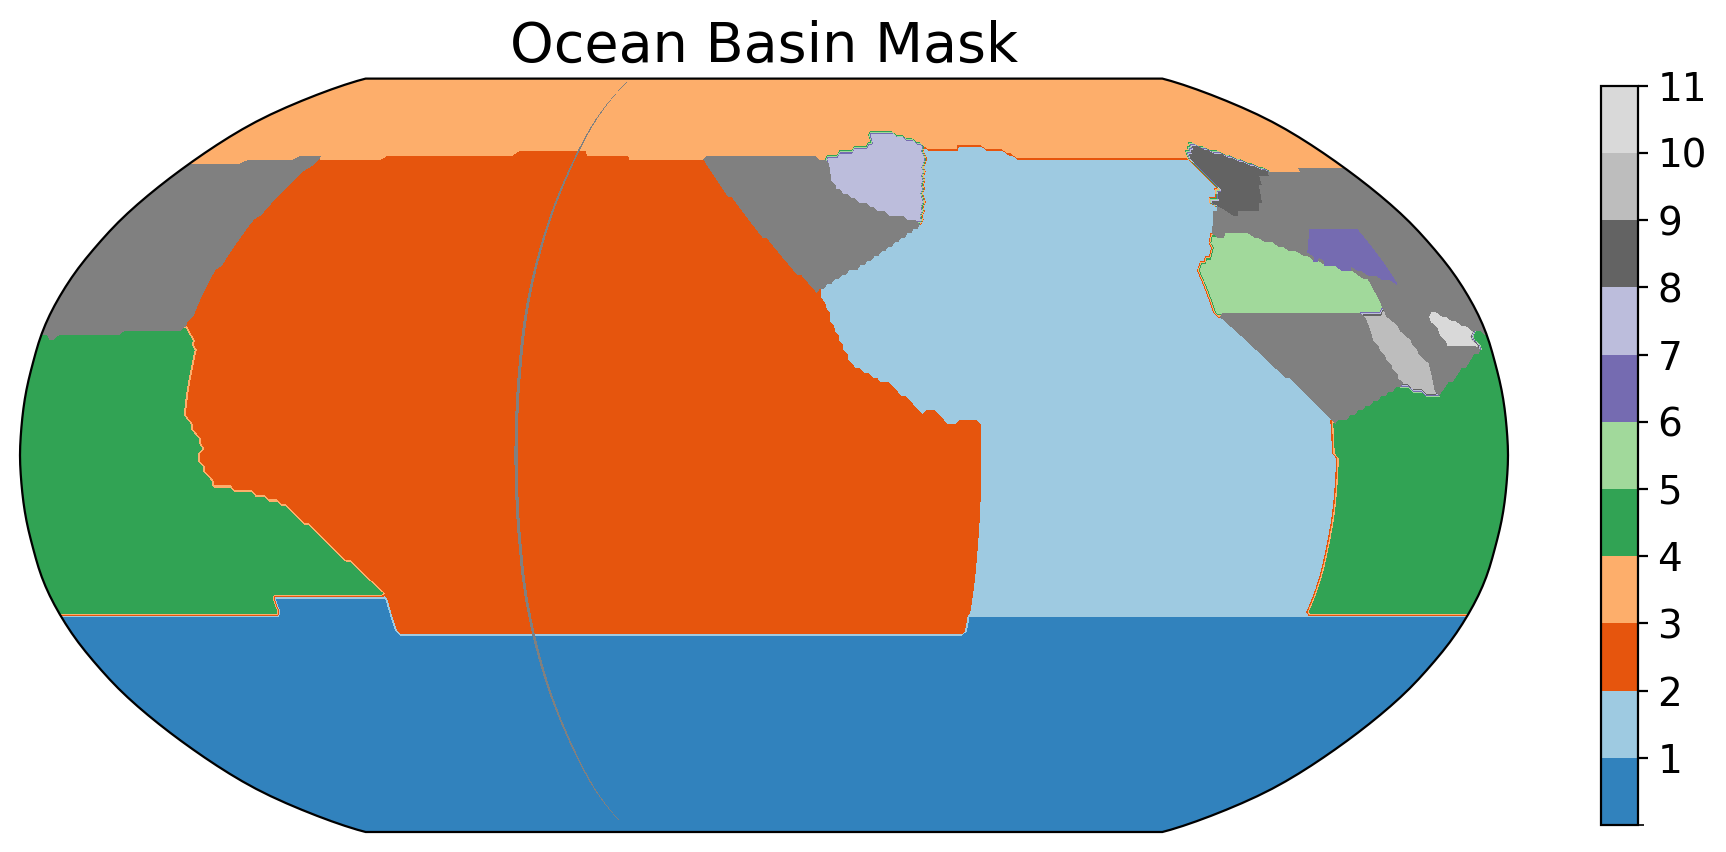

In [5]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_basins.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [6]:
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1)) ### Values 1 over atlantic, NaN elsewhere
atlanticocean = (woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2)) ### Values 1 over atlantic, NaN elsewhere
pacificocean=(woa18_basins.where(woa18_basins==3)/woa18_basins.where(woa18_basins==3))
arcticocean=(woa18_basins.where(woa18_basins==4)/woa18_basins.where(woa18_basins==4))
indianocean=(woa18_basins.where(woa18_basins==5)/woa18_basins.where(woa18_basins==5))
### and so on for the other basins ..... work through the code above step by step
### to make sure you understand it.

In [7]:
woa18_1955_64_atlantic = woa18_1955_64_potential_temp*atlanticocean

In [8]:
woa18_1955_64_indian = woa18_1955_64_potential_temp*indianocean

In [9]:
woa18_1955_64_pacific = woa18_1955_64_potential_temp*pacificocean

In [10]:
woa18_1955_64_southern = woa18_1955_64_potential_temp*southernocean

In [11]:
woa18_1955_64_arctic = woa18_1955_64_potential_temp*arcticocean

Text(0.5, 0.98, 'SST Atlantic 1955 to 1964 averaged')

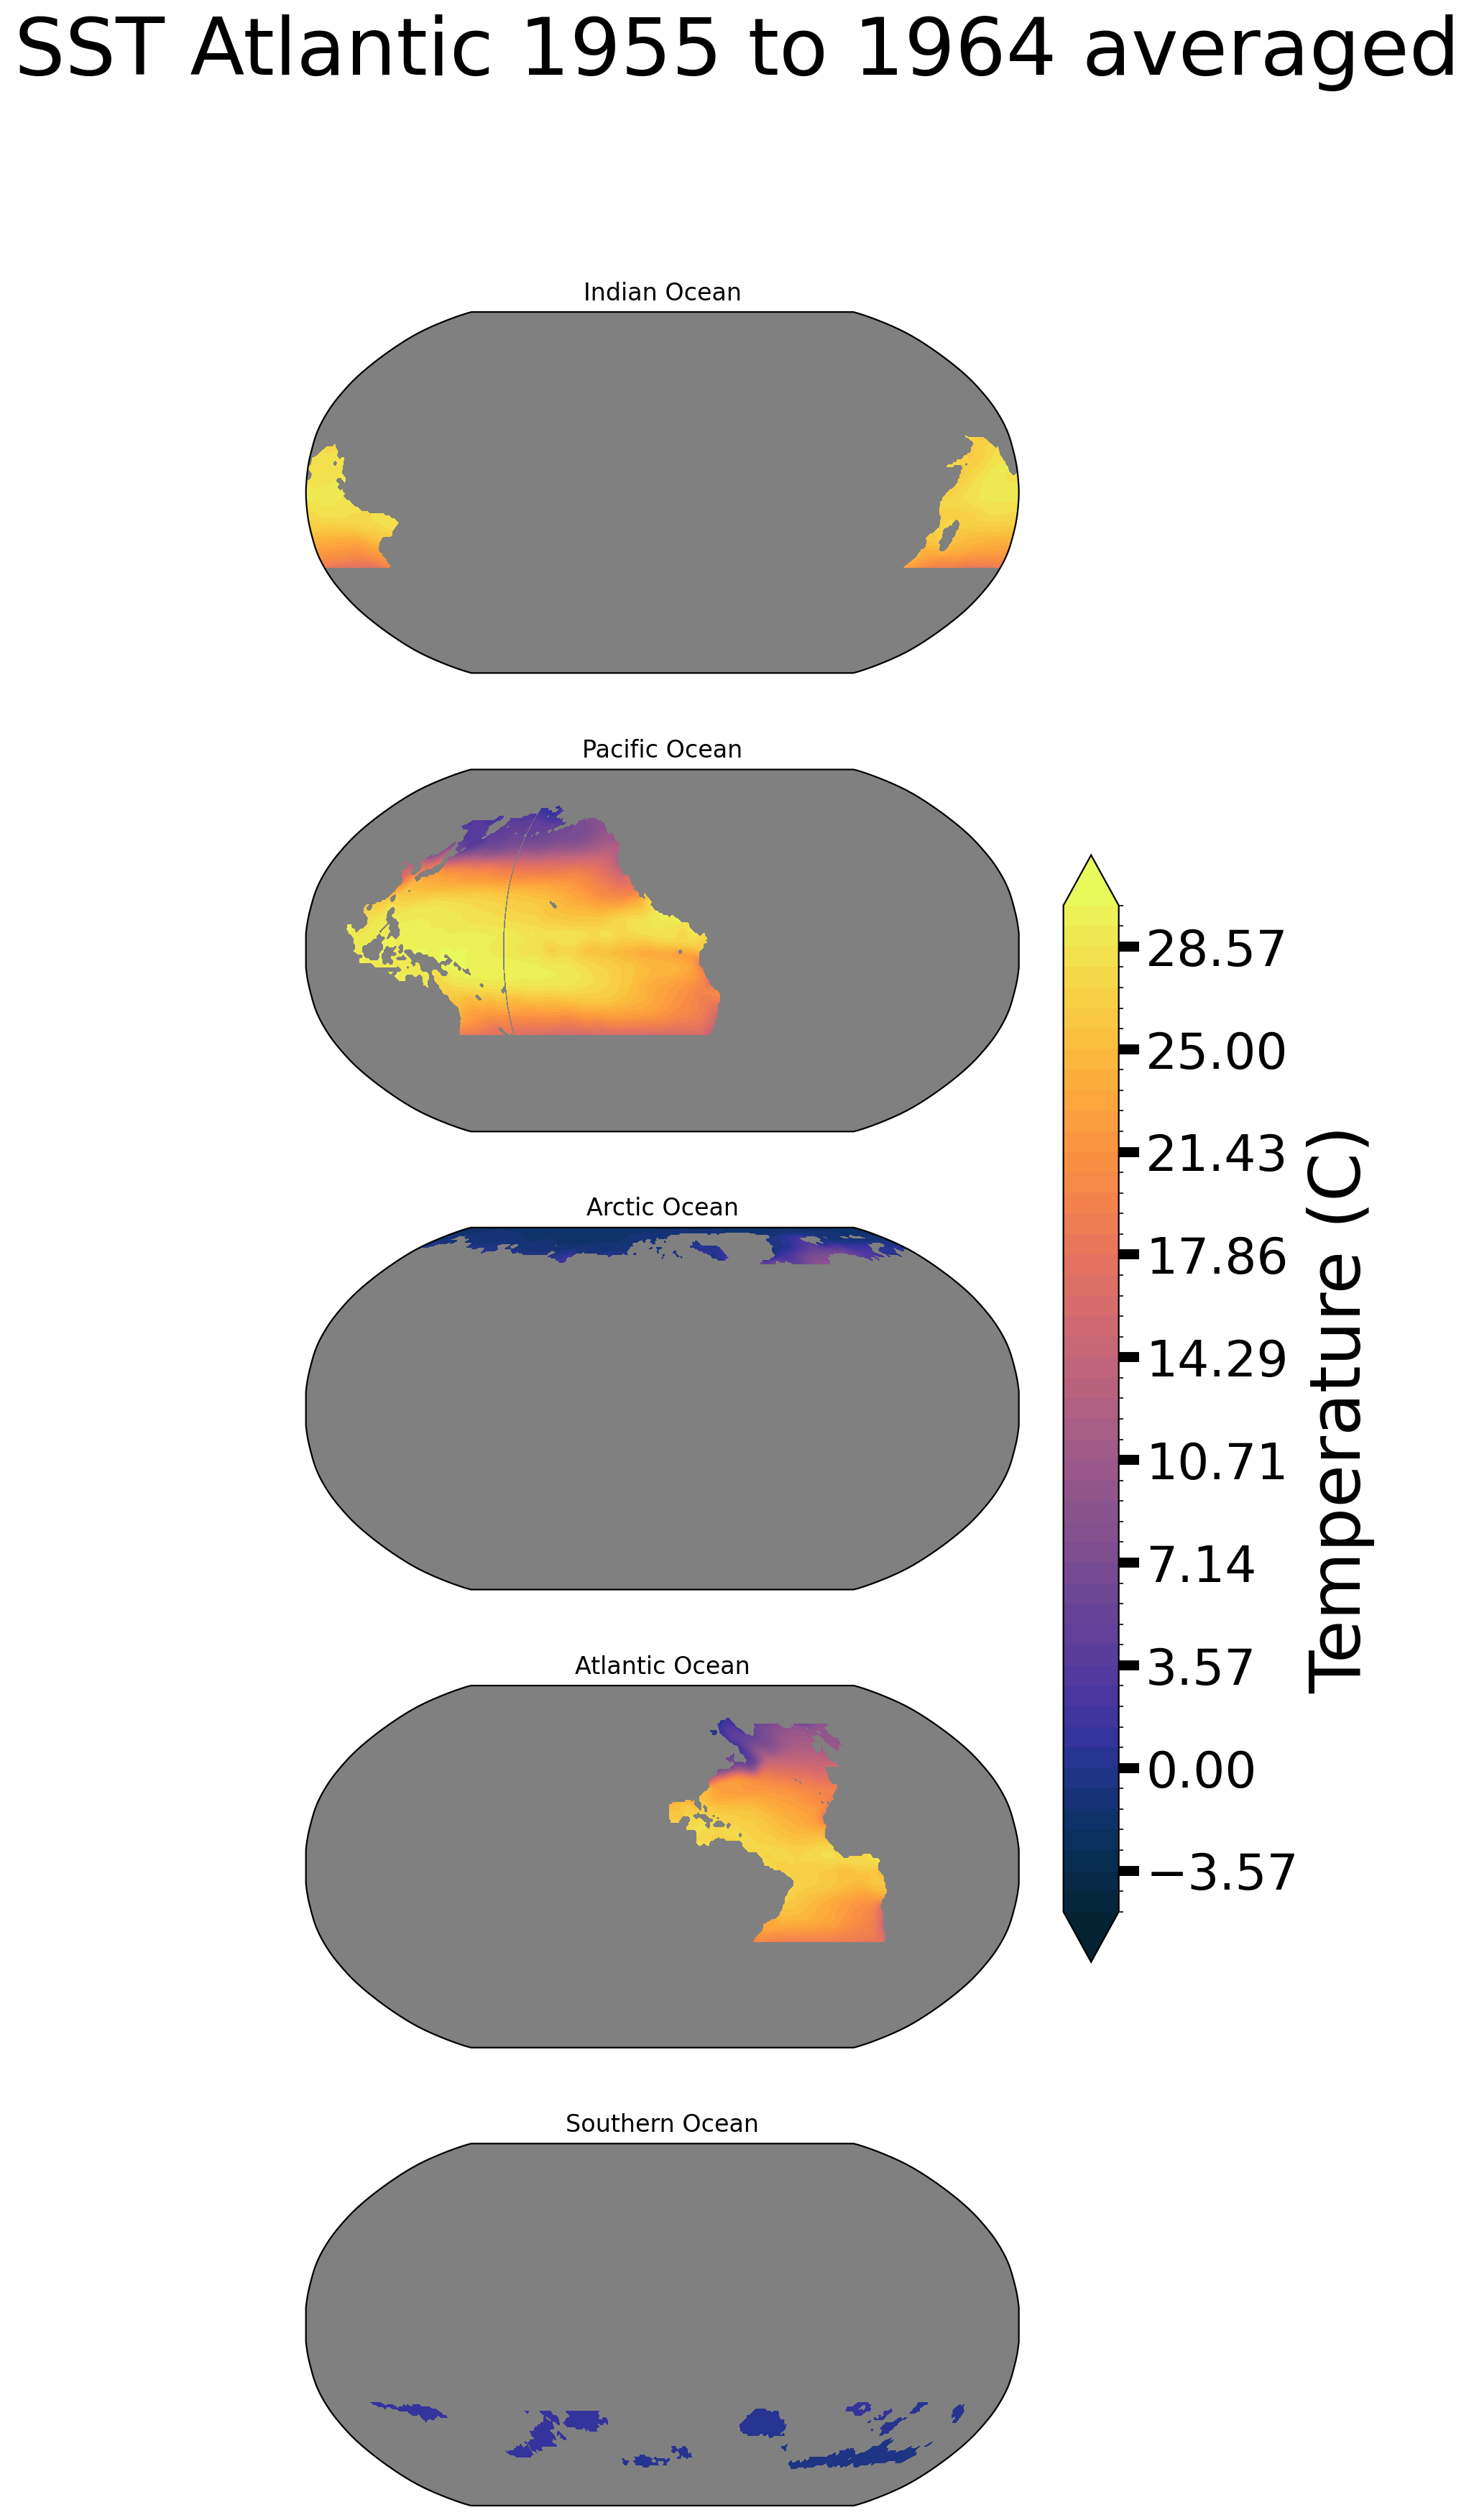

In [12]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-100),facecolor='grey')

fig, ax = plt.subplots(nrows=5,figsize=[8, 20],subplot_kw=subplot_kws)

p = woa18_1955_64_indian.isel(depth=0).plot.contourf(ax=ax[0],x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=-5,vmax=30,levels=50,extend='both',
                        
                      
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)
woa18_1955_64_pacific.isel(depth=0).plot.contourf(ax=ax[1],x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=-5,vmax=30,levels=50,
                         
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)
woa18_1955_64_arctic.isel(depth=0).plot.contourf(ax=ax[2],x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=-5,vmax=30,levels=50,
                         extend='both',
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)
woa18_1955_64_atlantic.isel(depth=0).plot.contourf(ax=ax[3],x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=-5,vmax=30,levels=50,extend='both',
                         
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)
woa18_1955_64_southern.isel(depth=-5).plot.contourf(ax=ax[4],x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=-5,vmax=30,levels=50,extend='both',
                         
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)
ax[0].set_title('Indian Ocean')
ax[1].set_title('Pacific Ocean')
ax[2].set_title('Arctic Ocean')
ax[3].set_title('Atlantic Ocean')
ax[4].set_title('Southern Ocean')
# add separate colorbar
cbar = fig.colorbar(p, ax=ax[0:5], orientation='vertical', label='Temperature (C)', 
                    extend='both', shrink=0.5)
cbar.set_label(label='Temperature (C)',size=35)
cbar.ax.tick_params(labelsize=25, length=10, width=5)
fig.suptitle("SST Atlantic 1955 to 1964 averaged",fontsize=40)

Text(0.5, 1.0, 'SST Atlantic 1955 to 1964 averaged')

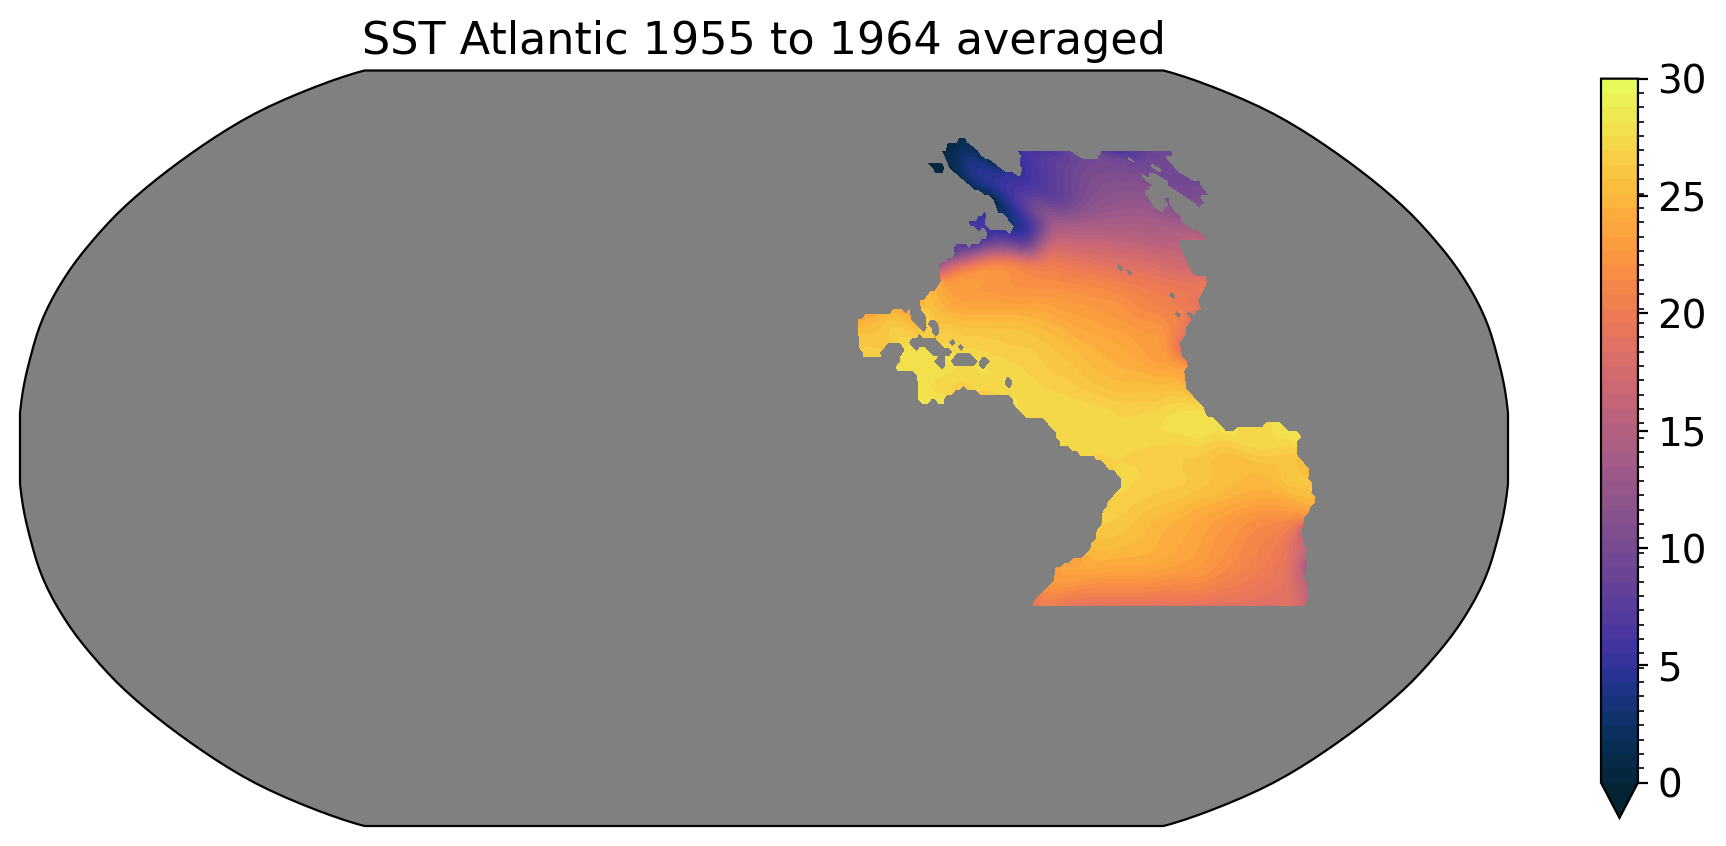

In [13]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1955_64_atlantic.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Atlantic 1955 to 1964 averaged",fontsize=16)

In [14]:
import warnings 

def standard_grid_cell_area(lat, lon, rE=6371.0e3):
    """ computes the cell area for a standard spherical grid """

    dLat = lat[1] - lat[0]
    dLon = lon[1] - lon[0]
    area = np.empty((len(lat), len(lon)))
    for j in range(0, len(lat)):
        for i in range(0, len(lon)):
            lon1 = lon[i] + dLon / 2
            lon0 = lon[i] - dLon / 2
            lat1 = lat[j] + dLat / 2
            lat0 = lat[j] - dLat / 2
            area[j, i] = (
                (np.pi / 180.0)
                * rE
                * rE
                * np.abs(np.sin(np.radians(lat0)) - np.sin(np.radians(lat1)))
                * np.abs(lon0 - lon1)
            )
    return area

In [15]:
lat_woa =woa18_1955_64_potential_temp.coords['lat'].values #1-D numpy array of model's latitude values
lon_woa = woa18_1955_64_potential_temp.coords['lon'].values #1-D numpy array of model's longitude values

# make sure to replace the name of the data array if you chose a 
# different name and use the appropriate coordinate names within the ['']
# based on the coordinates of lat / lon in your dataset.

# Pass the arrays to the standard_grid_cell_area function
areacell = standard_grid_cell_area(lat_woa,lon_woa)  

# The areacella_xarray function outputs a numpy array. Convert this back into 
# and xarray DataArray for further use. If this is a field you will be using 
# often. You may wish to save this newly created DataArray as a Dataset and save 
# as a netcdf file.

# here we assign dimensions and coordinates that are the same as our original SST array:

areacell_woa = xr.DataArray(areacell,dims=({'lat':180, 'lon':360}),\
                                                coords=(woa18_1955_64_potential_temp.coords['lat'],\
                                                        woa18_1955_64_potential_temp.coords['lon']))

In [16]:

weights_woa=areacell_woa


In [17]:
woa18_decav_potential_temp

<xarray.DataArray 'potential_temperature' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-potential_temperature, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    standard_name:  sea_water_temperature
    units:          degrees_celsius

In [18]:

weight_55_64_atlantic_0=( woa18_1955_64_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_pacific_0=( woa18_1955_64_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_southern_0=( woa18_1955_64_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_indian_0=( woa18_1955_64_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_arctic_0=( woa18_1955_64_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])


weight_65_74_atlantic_0=( woa18_1965_74_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_pacific_0=( woa18_1965_74_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_southern_0=( woa18_1965_74_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_indian_0=( woa18_1965_74_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_arctic_0=( woa18_1965_74_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_75_84_atlantic_0=( woa18_1975_84_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_pacific_0=( woa18_1975_84_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_southern_0=( woa18_1975_84_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_indian_0=( woa18_1975_84_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_arctic_0=( woa18_1975_84_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_85_94_atlantic_0=( woa18_1985_94_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_pacific_0=( woa18_1985_94_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_southern_0=( woa18_1985_94_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_indian_0=( woa18_1985_94_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_arctic_0=( woa18_1985_94_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_95_04_atlantic_0=( woa18_1995_04_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_pacific_0=( woa18_1995_04_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_southern_0=( woa18_1995_04_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_indian_0=( woa18_1995_04_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_arctic_0=( woa18_1995_04_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_05_17_atlantic_0=( woa18_2005_17_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_pacific_0=( woa18_2005_17_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_southern_0=( woa18_2005_17_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_indian_0=( woa18_2005_17_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_arctic_0=( woa18_2005_17_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_dec_atlantic_0=(woa18_decav_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_pacific_0=( woa18_decav_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_southern_0=( woa18_decav_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_indian_0=( woa18_decav_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_arctic_0=(woa18_decav_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

In [19]:
print(weight_55_64_atlantic_0.values)
print(weight_55_64_pacific_0.values)
print(weight_55_64_southern_0.values)
print(weight_55_64_indian_0.values)
print(weight_55_64_arctic_0.values)


21.713539334331532
22.852926790350942
6.932275342283883
25.928182461710282
0.23851683231575488


In [20]:
print(weight_65_74_atlantic_0.values)
print(weight_65_74_pacific_0.values)
print(weight_65_74_southern_0.values)
print(weight_65_74_indian_0.values)
print(weight_65_74_arctic_0.values)


21.645169705449195
22.80842965173571
6.957230573812462
25.820545860236052
0.17122328595289513


In [21]:
print(weight_75_84_atlantic_0.values)
print(weight_75_84_pacific_0.values)
print(weight_75_84_southern_0.values)
print(weight_75_84_indian_0.values)
print(weight_75_84_arctic_0.values)

21.720232392816943
22.94205067729655
7.095378726058748
26.052238696552386
0.11185705276212167


In [22]:
print(weight_85_94_atlantic_0.values)
print(weight_85_94_pacific_0.values)
print(weight_85_94_southern_0.values)
print(weight_85_94_indian_0.values)
print(weight_85_94_arctic_0.values)

21.854801525229995
23.10354990036115
7.137029900537824
26.04960233001993
0.0759004763177559


In [23]:
print(weight_95_04_atlantic_0.values)
print(weight_95_04_pacific_0.values)
print(weight_95_04_southern_0.values)
print(weight_95_04_indian_0.values)
print(weight_95_04_arctic_0.values)

22.140455212284042
23.260637838417207
7.104141464555034
26.20523128489495
0.37433336398099337


In [24]:
print(weight_05_17_atlantic_0.values)
print(weight_05_17_pacific_0.values)
print(weight_05_17_southern_0.values)
print(weight_05_17_indian_0.values)
print(weight_05_17_arctic_0.values)

22.251894649694478
23.345200218572618
7.112227959974979
26.42356057222046
0.4751386482046699


In [25]:
print(weight_dec_atlantic_0.values)
print(weight_dec_pacific_0.values)
print(weight_dec_southern_0.values)
print(weight_dec_indian_0.values)
print(weight_dec_arctic_0.values)


21.873621954477354
23.039807645873797
7.032931693864205
26.06812388227409
0.2126526660433765


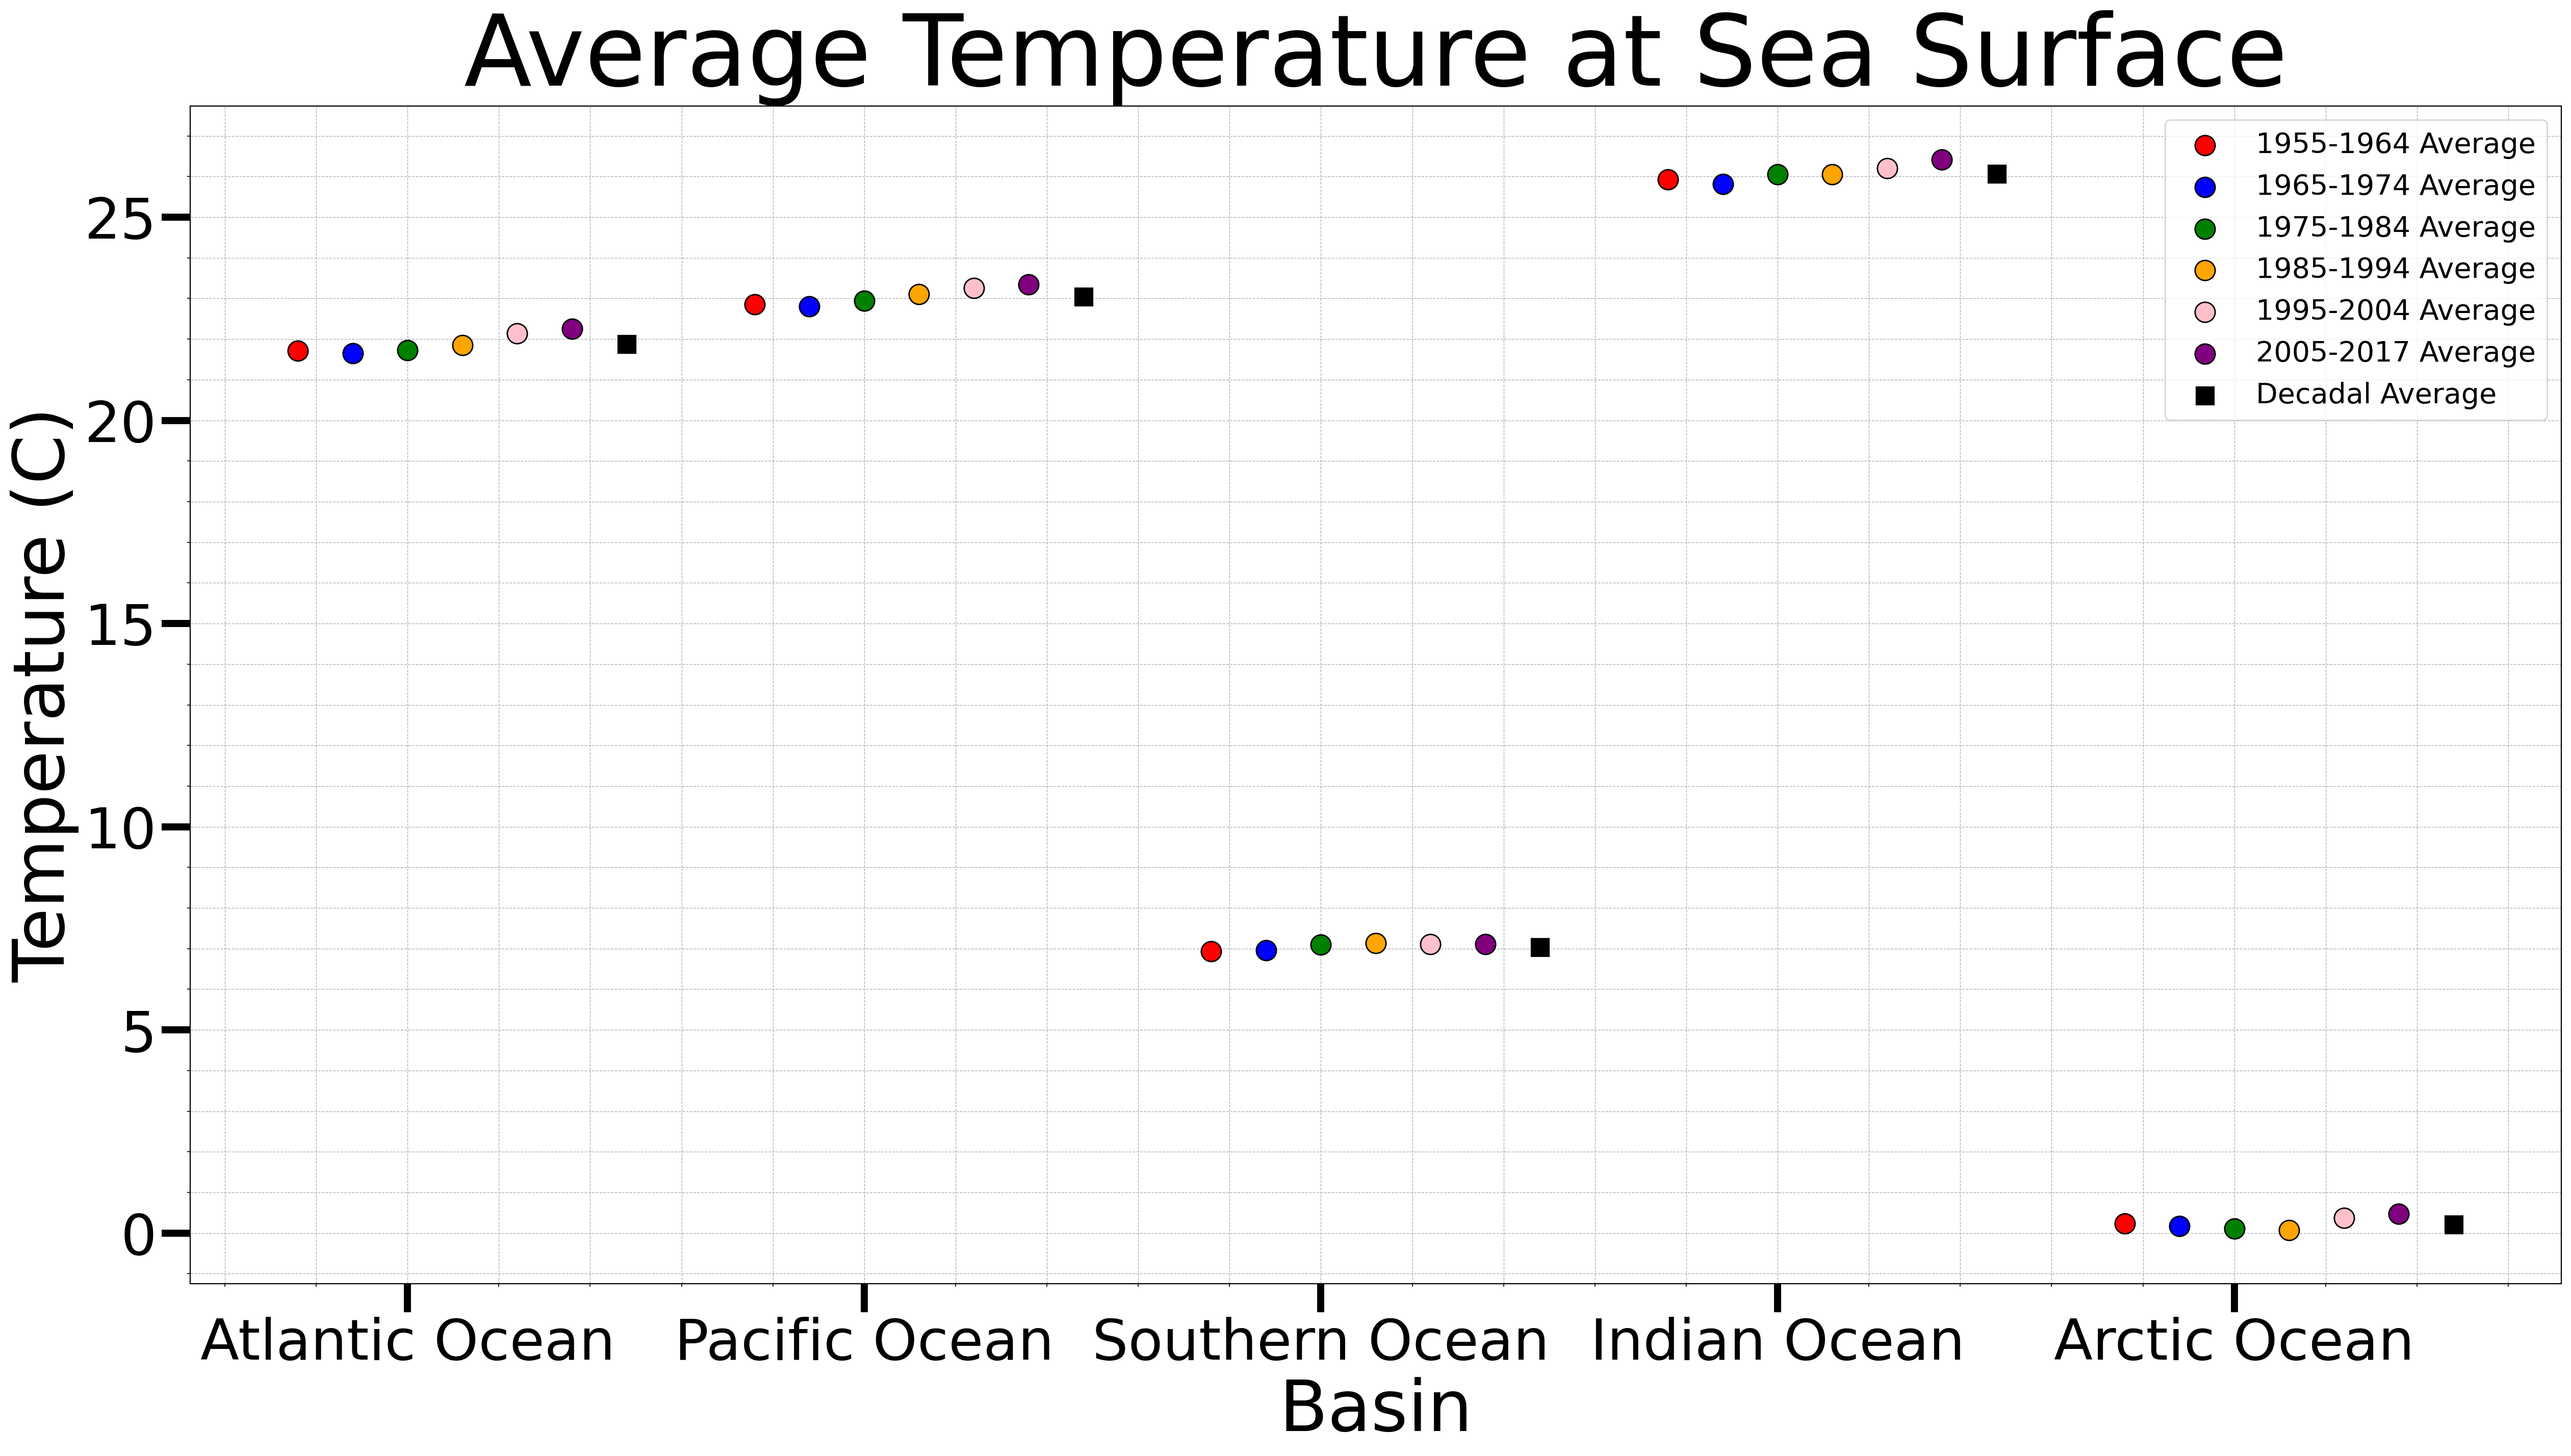

In [26]:
# Create the plot
fig, ax = plt.subplots(figsize=(30, 15))

# Data
X = ['Atlantic Ocean','Pacific Ocean','Southern Ocean','Indian Ocean', 'Arctic Ocean'] 
woa_55_64_0 = [21.713539334331532,
22.852926790350942,
6.932275342283883,
25.928182461710282,
0.23851683231575488]
woa_65_74_0 = [21.645169705449195,
22.80842965173571,
6.957230573812462,
25.820545860236052,
0.17122328595289513]
woa_75_84_0 = [21.720232392816943,
22.94205067729655,
7.095378726058748,
26.052238696552386,
0.11185705276212167]
woa_85_94_0 = [21.854801525229995,
23.10354990036115,
7.137029900537824,
26.04960233001993,
0.0759004763177559]
woa_95_04_0 = [22.140455212284042,
23.260637838417207,
7.104141464555034,
26.20523128489495,
0.37433336398099337

]
woa_05_17_0 = [22.251894649694478,
23.345200218572618,
7.112227959974979,
26.42356057222046,
0.4751386482046699]
woa_dec_0 = [21.873621954477354,
23.039807645873797,
7.032931693864205,
26.06812388227409,
0.2126526660433765]

# X-axis positions for the oceans
X_axis = np.arange(len(X)) 

# Define marker size and shift for each series
marker_size = 200  # Adjust the size of the scatter points
shift = 0.12

# Scatter plot for each time period
ax.scatter(X_axis - 2 * shift, woa_55_64_0, color='r', s=marker_size, label='1955-1964 Average', edgecolor='black')
ax.scatter(X_axis - shift, woa_65_74_0, color='blue', s=marker_size, label='1965-1974 Average', edgecolor='black')
ax.scatter(X_axis, woa_75_84_0, color='green', s=marker_size, label='1975-1984 Average', edgecolor='black')
ax.scatter(X_axis + shift, woa_85_94_0, color='orange', s=marker_size, label='1985-1994 Average', edgecolor='black')
ax.scatter(X_axis + 2 * shift, woa_95_04_0, color='pink', s=marker_size, label='1995-2004 Average', edgecolor='black')
ax.scatter(X_axis + 3 * shift, woa_05_17_0, color='purple', s=marker_size, label='2005-2017 Average', edgecolor='black')
ax.scatter(X_axis + 4 * shift, woa_dec_0, color='black', s=marker_size, label='Decadal Average', edgecolor='white', marker='s')
#ax.scatter(X_axis, woa_75_84_0, color='green', s=marker_size, edgecolor='black')

# Grid, ticks, and labels
ax.grid(linewidth=0.5, linestyle='--', which='both', axis='both')
ax.set_axisbelow(True)
plt.xticks(X_axis, X, fontsize=40) 
plt.yticks(fontsize=40)
plt.xlabel("Basin", fontsize=50) 
plt.ylabel("Temperature (C)", fontsize=50 )
plt.title("Average Temperature at Sea Surface", fontsize=70) 
#plt.ylim(270, 302)
ax.minorticks_on()

# Legend and tick adjustments
ax.legend(fontsize=20)
ax.tick_params(which='major', width=5)
ax.tick_params(which='major', length=20)


 **Fig 1** 10 year average of surface temperature from 1955-2017 with decadal average from WOA18 

In [27]:
woa18_decav_potential_temp

<xarray.DataArray 'potential_temperature' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-potential_temperature, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    standard_name:  sea_water_temperature
    units:          degrees_celsius

In [28]:

weight_55_64_atlantic_1000=( woa18_1955_64_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_pacific_1000=( woa18_1955_64_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_southern_1000=( woa18_1955_64_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_indian_1000=( woa18_1955_64_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_arctic_1000=( woa18_1955_64_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_65_74_atlantic_1000=( woa18_1965_74_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_pacific_1000=( woa18_1965_74_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_southern_1000=( woa18_1965_74_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_indian_1000=( woa18_1965_74_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_arctic_1000=( woa18_1965_74_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_75_84_atlantic_1000=( woa18_1975_84_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_pacific_1000=( woa18_1975_84_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_southern_1000=( woa18_1975_84_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_indian_1000=( woa18_1975_84_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_arctic_1000=( woa18_1975_84_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_85_94_atlantic_1000=( woa18_1985_94_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_pacific_1000=( woa18_1985_94_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_southern_1000=( woa18_1985_94_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_indian_1000=( woa18_1985_94_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_arctic_1000=( woa18_1985_94_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_95_04_atlantic_1000=( woa18_1995_04_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_pacific_1000=( woa18_1995_04_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_southern_1000=( woa18_1995_04_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_indian_1000=( woa18_1995_04_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_arctic_1000=( woa18_1995_04_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_05_17_atlantic_1000=( woa18_2005_17_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_pacific_1000=( woa18_2005_17_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_southern_1000=( woa18_2005_17_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_indian_1000=( woa18_2005_17_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_arctic_1000=( woa18_2005_17_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_dec_atlantic_1000=(woa18_decav_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_pacific_1000=( woa18_decav_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_southern_1000=( woa18_decav_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_indian_1000=( woa18_decav_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_arctic_1000=(woa18_decav_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

In [29]:
print(weight_55_64_atlantic_1000.values)
print(weight_55_64_pacific_1000.values)
print(weight_55_64_southern_1000.values)
print(weight_55_64_indian_1000.values)
print(weight_55_64_arctic_1000.values)


5.185698485581848
4.182381717193431
2.9698632744558573
6.017776330378069
-0.21657426065335872


In [30]:
print(weight_65_74_atlantic_1000.values)
print(weight_65_74_pacific_1000.values)
print(weight_65_74_southern_1000.values)
print(weight_65_74_indian_1000.values)
print(weight_65_74_arctic_1000.values)


5.187498056393757
4.1837130040305395
2.9656235797099058
6.037779547333845
-0.2208475375197744


In [31]:
print(weight_75_84_atlantic_1000.values)
print(weight_75_84_pacific_1000.values)
print(weight_75_84_southern_1000.values)
print(weight_75_84_indian_1000.values)
print(weight_75_84_arctic_1000.values)

5.226079292424071
4.1767388433676365
2.964392961821596
6.045707530764
-0.2236209031430634


In [32]:
print(weight_85_94_atlantic_1000.values)
print(weight_85_94_pacific_1000.values)
print(weight_85_94_southern_1000.values)
print(weight_85_94_indian_1000.values)
print(weight_85_94_arctic_1000.values)

5.254896626473482
4.1860121963109265
2.960617859433133
6.02497249357261
-0.2296329594865349


In [33]:
print(weight_95_04_atlantic_1000.values)
print(weight_95_04_pacific_1000.values)
print(weight_95_04_southern_1000.values)
print(weight_95_04_indian_1000.values)
print(weight_95_04_arctic_1000.values)

5.266477742142868
4.198713216162039
3.013712523267611
6.030725676067688
-0.220122649044458


In [34]:
print(weight_05_17_atlantic_1000.values)
print(weight_05_17_pacific_1000.values)
print(weight_05_17_southern_1000.values)
print(weight_05_17_indian_1000.values)
print(weight_05_17_arctic_1000.values)

5.293445076286856
4.2104764574707225
3.0306472337020343
6.055248207472613
-0.17892909294817938


In [35]:
print(weight_dec_atlantic_1000.values)
print(weight_dec_pacific_1000.values)
print(weight_dec_southern_1000.values)
print(weight_dec_indian_1000.values)
print(weight_dec_arctic_1000.values)

5.235519726386714
4.18916845658299
2.9831278578268474
6.033843924328877
-0.21456162590664854


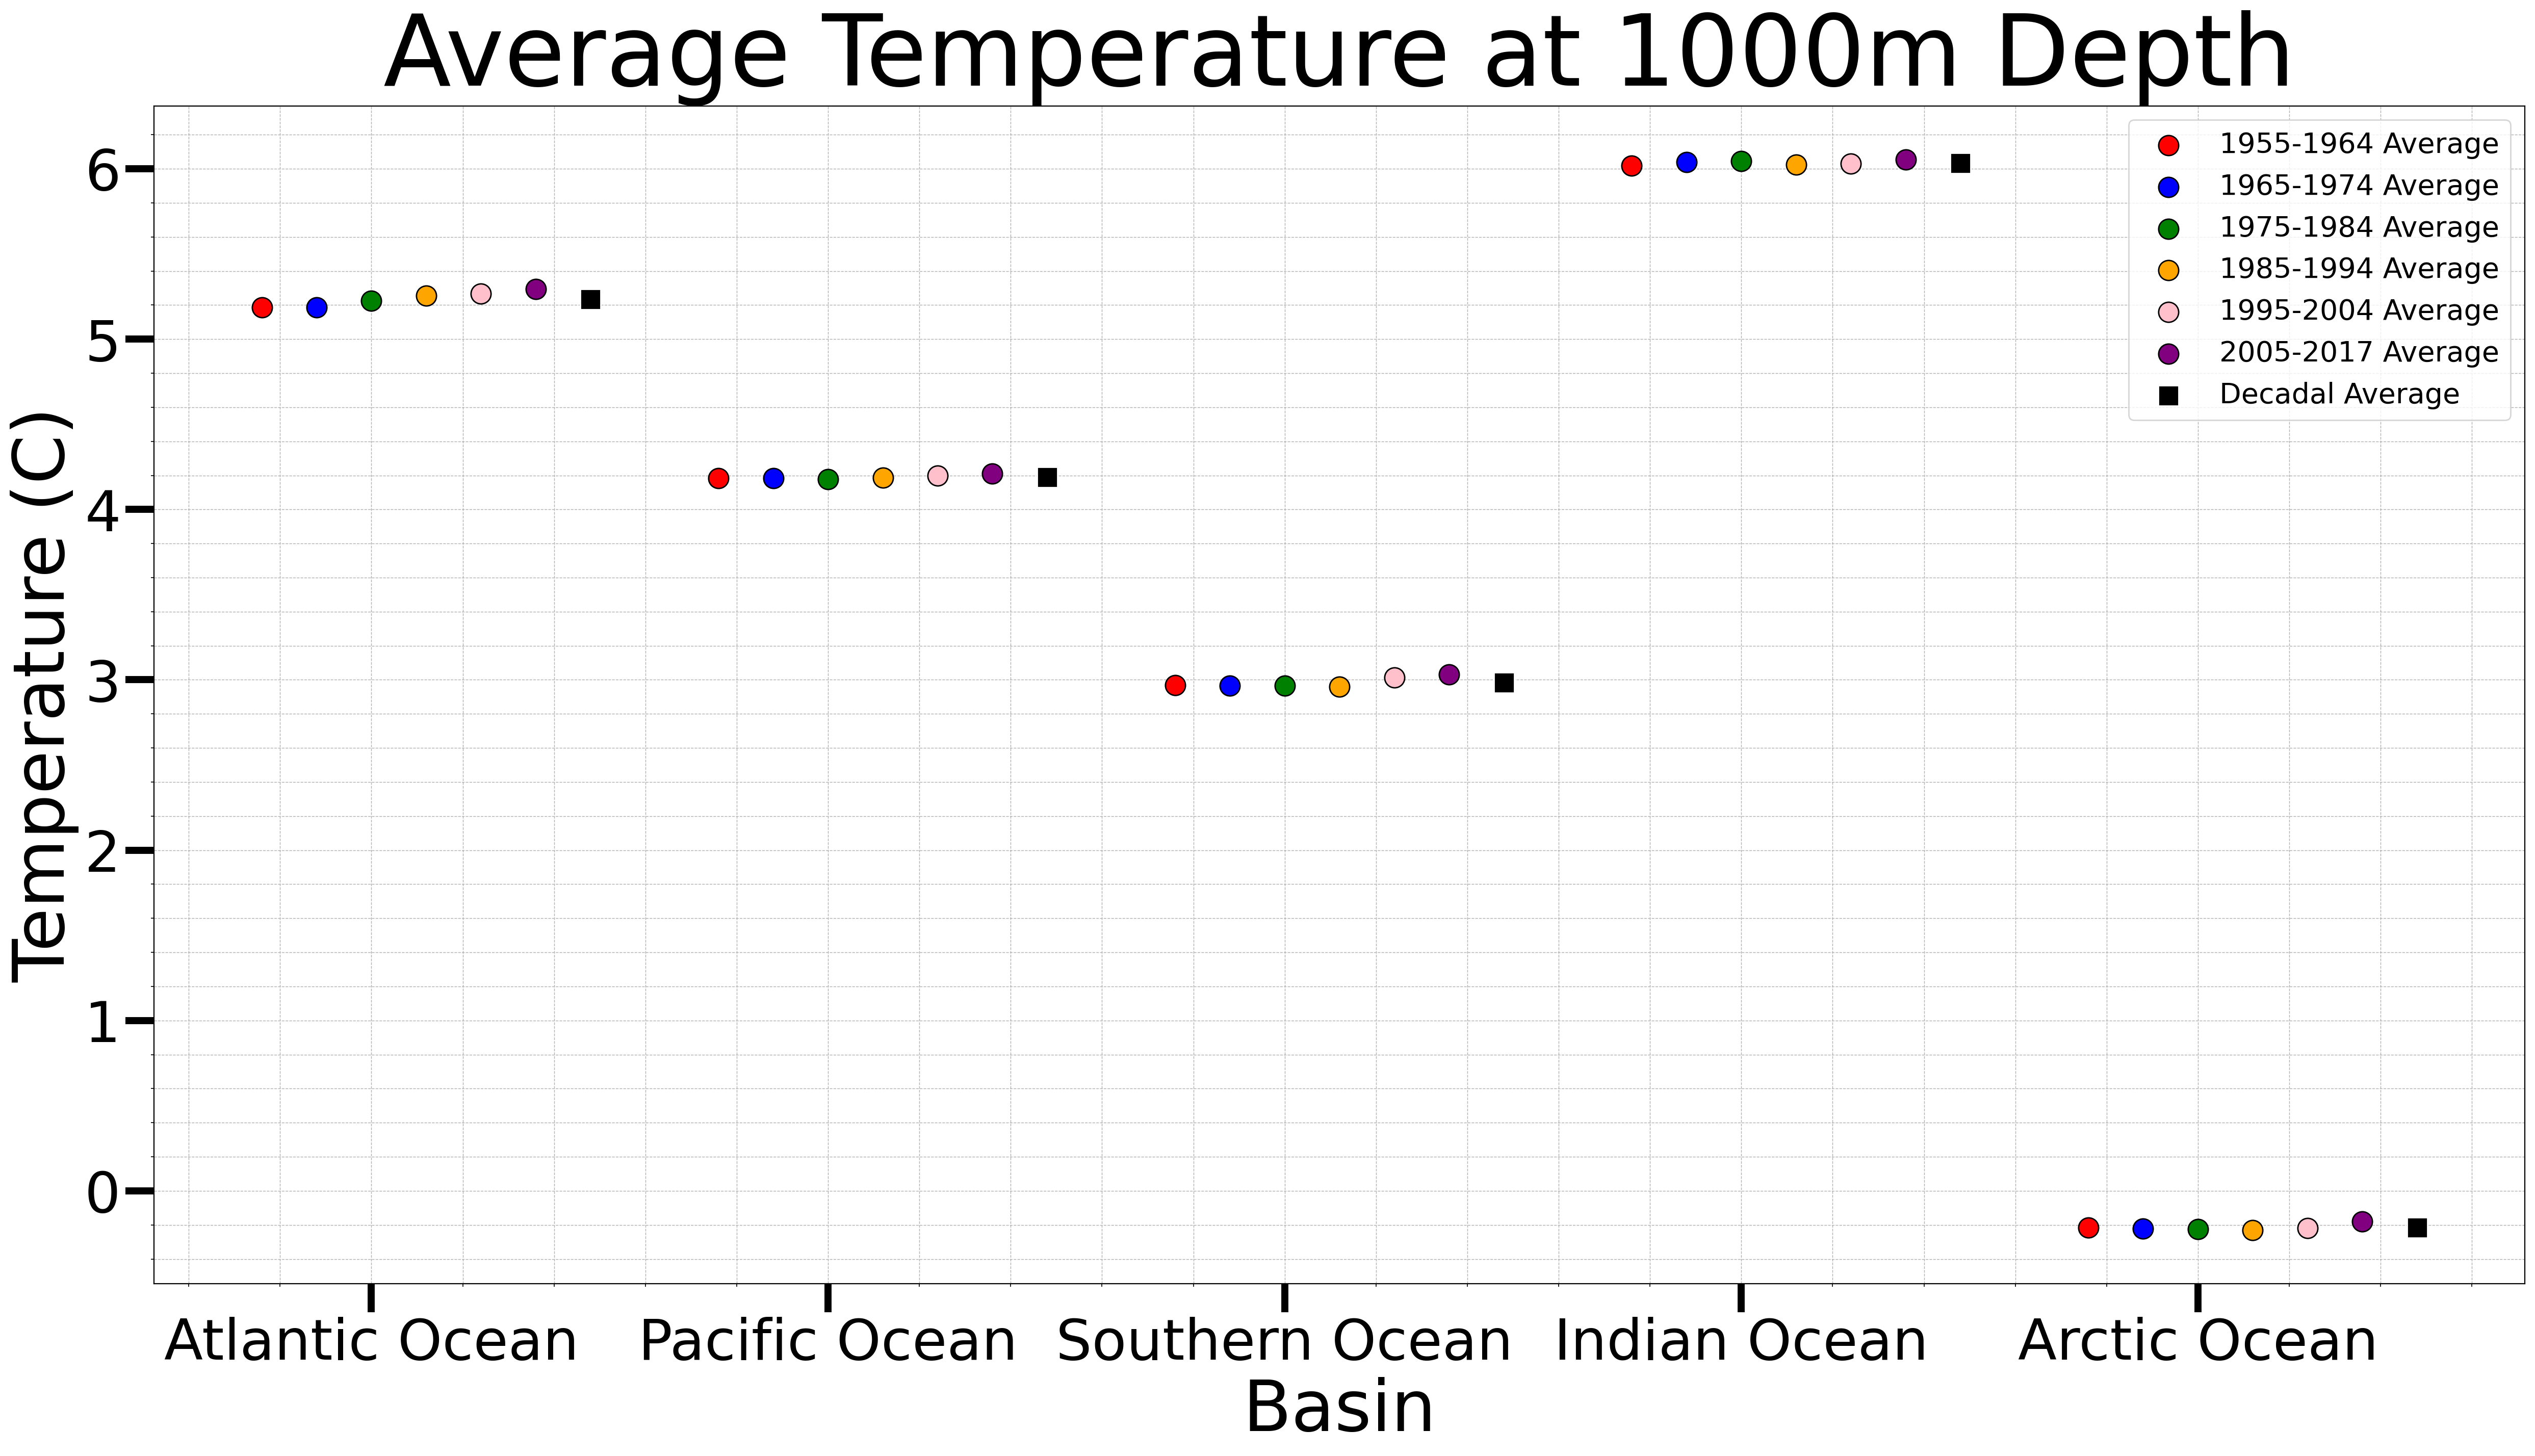

In [36]:
X = ['Atlantic Ocean', 'Pacific Ocean', 'Southern Ocean', 'Indian Ocean', 'Arctic Ocean'] 
woa_55_64_1000 = [5.185698485581848,
4.182381717193431,
2.9698632744558573,
6.017776330378069,
-0.21657426065335872]
woa_65_74_1000 = [5.187498056393757,
4.1837130040305395,
2.9656235797099058,
6.037779547333845,
-0.2208475375197744]
woa_75_84_1000 = [5.226079292424071,
4.1767388433676365,
2.964392961821596,
6.045707530764,
-0.2236209031430634]
woa_85_94_1000 = [5.254896626473482,
4.1860121963109265,
2.960617859433133,
6.02497249357261,
-0.2296329594865349]
woa_95_04_1000 = [5.266477742142868,
4.198713216162039,
3.013712523267611,
6.030725676067688,
-0.220122649044458]
woa_05_17_1000 = [5.293445076286856,
4.2104764574707225,
3.0306472337020343,
6.055248207472613,
-0.17892909294817938]
woa_dec_1000 = [5.235519726386714,
4.18916845658299,
2.9831278578268474,
6.033843924328877,
-0.21456162590664854]

# X-axis positions for the oceans
X_axis = np.arange(len(X)) 
marker_size = 200  # Adjust the size of the scatter points
shift = 0.12      # Shift for each dataset

# Create the plot
fig, ax = plt.subplots(figsize=(30, 15))

# Scatter plot for each time period
ax.scatter(X_axis - 2 * shift, woa_55_64_1000, color='r', s=marker_size, label='1955-1964 Average', edgecolor='black')
ax.scatter(X_axis - shift, woa_65_74_1000, color='blue', s=marker_size, label='1965-1974 Average', edgecolor='black')
ax.scatter(X_axis, woa_75_84_1000, color='green', s=marker_size, label='1975-1984 Average', edgecolor='black')
ax.scatter(X_axis + shift, woa_85_94_1000, color='orange', s=marker_size, label='1985-1994 Average', edgecolor='black')
ax.scatter(X_axis + 2 * shift, woa_95_04_1000, color='pink', s=marker_size, label='1995-2004 Average', edgecolor='black')
ax.scatter(X_axis + 3 * shift, woa_05_17_1000, color='purple', s=marker_size, label='2005-2017 Average', edgecolor='black')
ax.scatter(X_axis +4 * shift, woa_dec_1000, color='black', s=marker_size, label='Decadal Average', edgecolor='white', marker='s')

# Add the new data (woa_dec_1000) in black with square markers


# Grid, ticks, and labels
ax.grid(linewidth=0.5, linestyle='--', which='both', axis='both')
ax.set_axisbelow(True)
plt.xticks(X_axis, X, fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel("Basin", fontsize=50) 
plt.ylabel("Temperature (C)", fontsize=50)
plt.title("Average Temperature at 1000m Depth", fontsize=70) 
# plt.ylim(272, 280)
ax.minorticks_on()

# Legend and tick adjustments
ax.legend(fontsize=20)
ax.tick_params(which='major', width=5)
ax.tick_params(which='major', length=20)

 **Fig 2** 10 year average of temperature in Kelvin at 1000m depth from 1955-2017 with decadal average from WOA18 

## Switch to scatter plot and can incorporate heat content data set, could average depths for heat content

In [37]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [38]:
gfdl_esm4_thetao_data = google_cloud_cmip6.query(
    "activity_id=='CMIP' & \
    table_id == 'Omon' & \
    variable_id == 'thetao' & \
    experiment_id == 'historical' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [39]:
gfdl_esm4_thetao_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
245206,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r1i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20190726


In [40]:
gcs = gcsfs.GCSFileSystem(token='anon')
zstore = gfdl_esm4_thetao_data.zstore.values[-1]
mapper = gcs.get_mapper(zstore)

gfdl_esm4_thetao_data = xr.open_zarr(mapper, consolidated=True)
gfdl_esm4_thetao_data


<xarray.Dataset>
Dimensions:    (lat: 180, bnds: 2, lev: 35, lon: 360, time: 1980)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    thetao     (time, lev, lat, lon) float32 dask.array<chunksize=(12, 35, 180, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    comment:                <null ref>
    ...                     ...
    variable_id:            thetao
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/248958fd-cc5a-4876-a4b6-61edc24d6ddc...
    version_id:             v20190726

In [41]:
gfdl_esm4_thetao=gfdl_esm4_thetao_data.thetao

In [42]:
lat_esm4 =gfdl_esm4_thetao.coords['lat'].values #1-D numpy array of model's latitude values
lon_esm4 = gfdl_esm4_thetao.coords['lon'].values #1-D numpy array of model's longitude values

# make sure to replace the name of the data array if you chose a 
# different name and use the appropriate coordinate names within the ['']
# based on the coordinates of lat / lon in your dataset.

# Pass the arrays to the standard_grid_cell_area function
areacell = standard_grid_cell_area(lat_esm4,lon_esm4)  

# The areacella_xarray function outputs a numpy array. Convert this back into 
# and xarray DataArray for further use. If this is a field you will be using 
# often. You may wish to save this newly created DataArray as a Dataset and save 
# as a netcdf file.

# here we assign dimensions and coordinates that are the same as our original SST array:

areacell_esm4 = xr.DataArray(areacell,dims=({'lat':180, 'lon':360}),\
                                                coords=(gfdl_esm4_thetao.coords['lat'],\
                                                        gfdl_esm4_thetao.coords['lon']))

In [43]:
weights_esm4=areacell_esm4

In [44]:
esm4_55_64=gfdl_esm4_thetao.sel(time=slice('1955-01-16', '1964-12-16')).mean('time')
esm4_65_74=gfdl_esm4_thetao.sel(time=slice('1965-01-16', '1974-12-16')).mean('time')
esm4_75_84=gfdl_esm4_thetao.sel(time=slice('1975-01-16', '1984-12-16')).mean('time')
esm4_85_94=gfdl_esm4_thetao.sel(time=slice('1985-01-16', '1994-12-16')).mean('time')
esm4_95_04=gfdl_esm4_thetao.sel(time=slice('1995-01-16', '2004-12-16')).mean('time')
esm4_05_17=gfdl_esm4_thetao.sel(time=slice('2005-01-16', '2017-12-16')).mean('time')
esm4_dec_av=((esm4_55_64+esm4_65_74+esm4_75_84+esm4_85_94+esm4_95_04+esm4_05_17)/6)

In [45]:
esm4_55_64

<xarray.DataArray 'thetao' (lev: 35, lat: 180, lon: 360)>
dask.array<mean_agg-aggregate, shape=(35, 180, 360), dtype=float32, chunksize=(35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

In [46]:

    weight_esm4_55_64_atlantic_0=(esm4_55_64*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_55_64_pacific_0=( esm4_55_64*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_55_64_southern_0=( esm4_55_64*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_55_64_indian_0=( esm4_55_64*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_55_64_arctic_0=( esm4_55_64*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_65_74_atlantic_0=( esm4_65_74*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_65_74_pacific_0=(esm4_65_74*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_65_74_southern_0=(esm4_65_74*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_65_74_indian_0=( esm4_65_74*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_65_74_arctic_0=( esm4_65_74*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_75_84_atlantic_0=( esm4_75_84*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_75_84_pacific_0=( esm4_75_84*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_75_84_southern_0=( esm4_75_84*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_75_84_indian_0=( esm4_75_84*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_75_84_arctic_0=( esm4_75_84*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_85_94_atlantic_0=( esm4_85_94*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_85_94_pacific_0=( esm4_85_94*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_85_94_southern_0=( esm4_85_94*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_85_94_indian_0=( esm4_85_94*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_85_94_arctic_0=( esm4_85_94*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_95_04_atlantic_0=( esm4_95_04*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_95_04_pacific_0=( esm4_95_04*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_95_04_southern_0=( esm4_95_04*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_95_04_indian_0=( esm4_95_04*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_95_04_arctic_0=( esm4_95_04*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_05_17_atlantic_0=( esm4_05_17*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_05_17_pacific_0=( esm4_05_17*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_05_17_southern_0=( esm4_05_17*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_05_17_indian_0=( esm4_05_17*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_05_17_arctic_0=( esm4_05_17*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_dec_atlantic_0=(esm4_dec_av*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_dec_pacific_0=( esm4_dec_av*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_dec_southern_0=( esm4_dec_av*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_dec_indian_0=( esm4_dec_av*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_dec_arctic_0=(esm4_dec_av*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

In [47]:

    weight_esm4_55_64_atlantic_1000=(esm4_55_64*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_55_64_pacific_1000=( esm4_55_64*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_55_64_southern_1000=( esm4_55_64*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_55_64_indian_1000=( esm4_55_64*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_55_64_arctic_1000=( esm4_55_64*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_65_74_atlantic_1000=( esm4_65_74*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_65_74_pacific_1000=(esm4_65_74*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_65_74_southern_1000=(esm4_65_74*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_65_74_indian_1000=( esm4_65_74*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_65_74_arctic_1000=( esm4_65_74*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_75_84_atlantic_1000=( esm4_75_84*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_75_84_pacific_1000=( esm4_75_84*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_75_84_southern_1000=( esm4_75_84*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_75_84_indian_1000=( esm4_75_84*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_75_84_arctic_1000=( esm4_75_84*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_85_94_atlantic_1000=( esm4_85_94*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_85_94_pacific_1000=( esm4_85_94*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_85_94_southern_1000=( esm4_85_94*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_85_94_indian_1000=( esm4_85_94*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_85_94_arctic_1000=( esm4_85_94*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_95_04_atlantic_1000=( esm4_95_04*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_95_04_pacific_1000=( esm4_95_04*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_95_04_southern_1000=( esm4_95_04*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_95_04_indian_1000=( esm4_95_04*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_95_04_arctic_1000=( esm4_95_04*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_05_17_atlantic_1000=( esm4_05_17*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_05_17_pacific_1000=( esm4_05_17*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_05_17_southern_1000=( esm4_05_17*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_05_17_indian_1000=( esm4_05_17*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_05_17_arctic_1000=( esm4_05_17*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

    weight_esm4_dec_atlantic_1000=(esm4_dec_av*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_dec_pacific_1000=( esm4_dec_av*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_dec_southern_1000=( esm4_dec_av*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_dec_indian_1000=( esm4_dec_av*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
    weight_esm4_dec_arctic_1000=(esm4_dec_av*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

In [48]:

print(weight_esm4_55_64_atlantic_0.values)
print(weight_esm4_55_64_pacific_0.values)
print(weight_esm4_55_64_southern_0.values)
print(weight_esm4_55_64_indian_0.values)
print(weight_esm4_55_64_arctic_0.values)

22.055007411375048
22.838501968267646
7.896285841652177
25.713003230630385
0.44841313110263326


In [49]:
print(weight_esm4_65_74_atlantic_0.values)
print(weight_esm4_65_74_pacific_0.values)
print(weight_esm4_65_74_southern_0.values)
print(weight_esm4_65_74_indian_0.values)
print(weight_esm4_65_74_arctic_0.values)


22.20218008185678
22.739882177849843
7.957597683424093
25.734527273536635
0.29240197072292456


In [50]:
print(weight_esm4_75_84_atlantic_0.values)
print(weight_esm4_75_84_pacific_0.values)
print(weight_esm4_75_84_southern_0.values)
print(weight_esm4_75_84_indian_0.values)
print(weight_esm4_75_84_arctic_0.values)

22.22274305051252
22.808951237094966
8.077784778779618
25.920081837144345
-0.08320660951374802


In [51]:
print(weight_esm4_85_94_atlantic_0.values)
print(weight_esm4_85_94_pacific_0.values)
print(weight_esm4_85_94_southern_0.values)
print(weight_esm4_85_94_indian_0.values)
print(weight_esm4_85_94_arctic_0.values)

22.287988855050987
22.75468044935329
8.192662295914621
25.886847443659164
0.2395837570613313


In [52]:
print(weight_esm4_95_04_atlantic_0.values)
print(weight_esm4_95_04_pacific_0.values)
print(weight_esm4_95_04_southern_0.values)
print(weight_esm4_95_04_indian_0.values)
print(weight_esm4_95_04_arctic_0.values)

22.348661682314468
22.98761167079241
8.30426117267382
26.108491674680543
0.33766831349937265


In [53]:
print(weight_esm4_05_17_atlantic_0.values)
print(weight_esm4_05_17_pacific_0.values)
print(weight_esm4_05_17_southern_0.values)
print(weight_esm4_05_17_indian_0.values)
print(weight_esm4_05_17_arctic_0.values)

22.78572259030994
23.202771795606093
8.42406720676137
26.200594493314632
0.357453568609466


In [54]:
print(weight_esm4_dec_atlantic_0.values)
print(weight_esm4_dec_pacific_0.values)
print(weight_esm4_dec_southern_0.values)
print(weight_esm4_dec_indian_0.values)
print(weight_esm4_dec_arctic_0.values)


22.317050678144874
22.888733235526033
8.142109851140521
25.927257667772164
0.2653856935717388


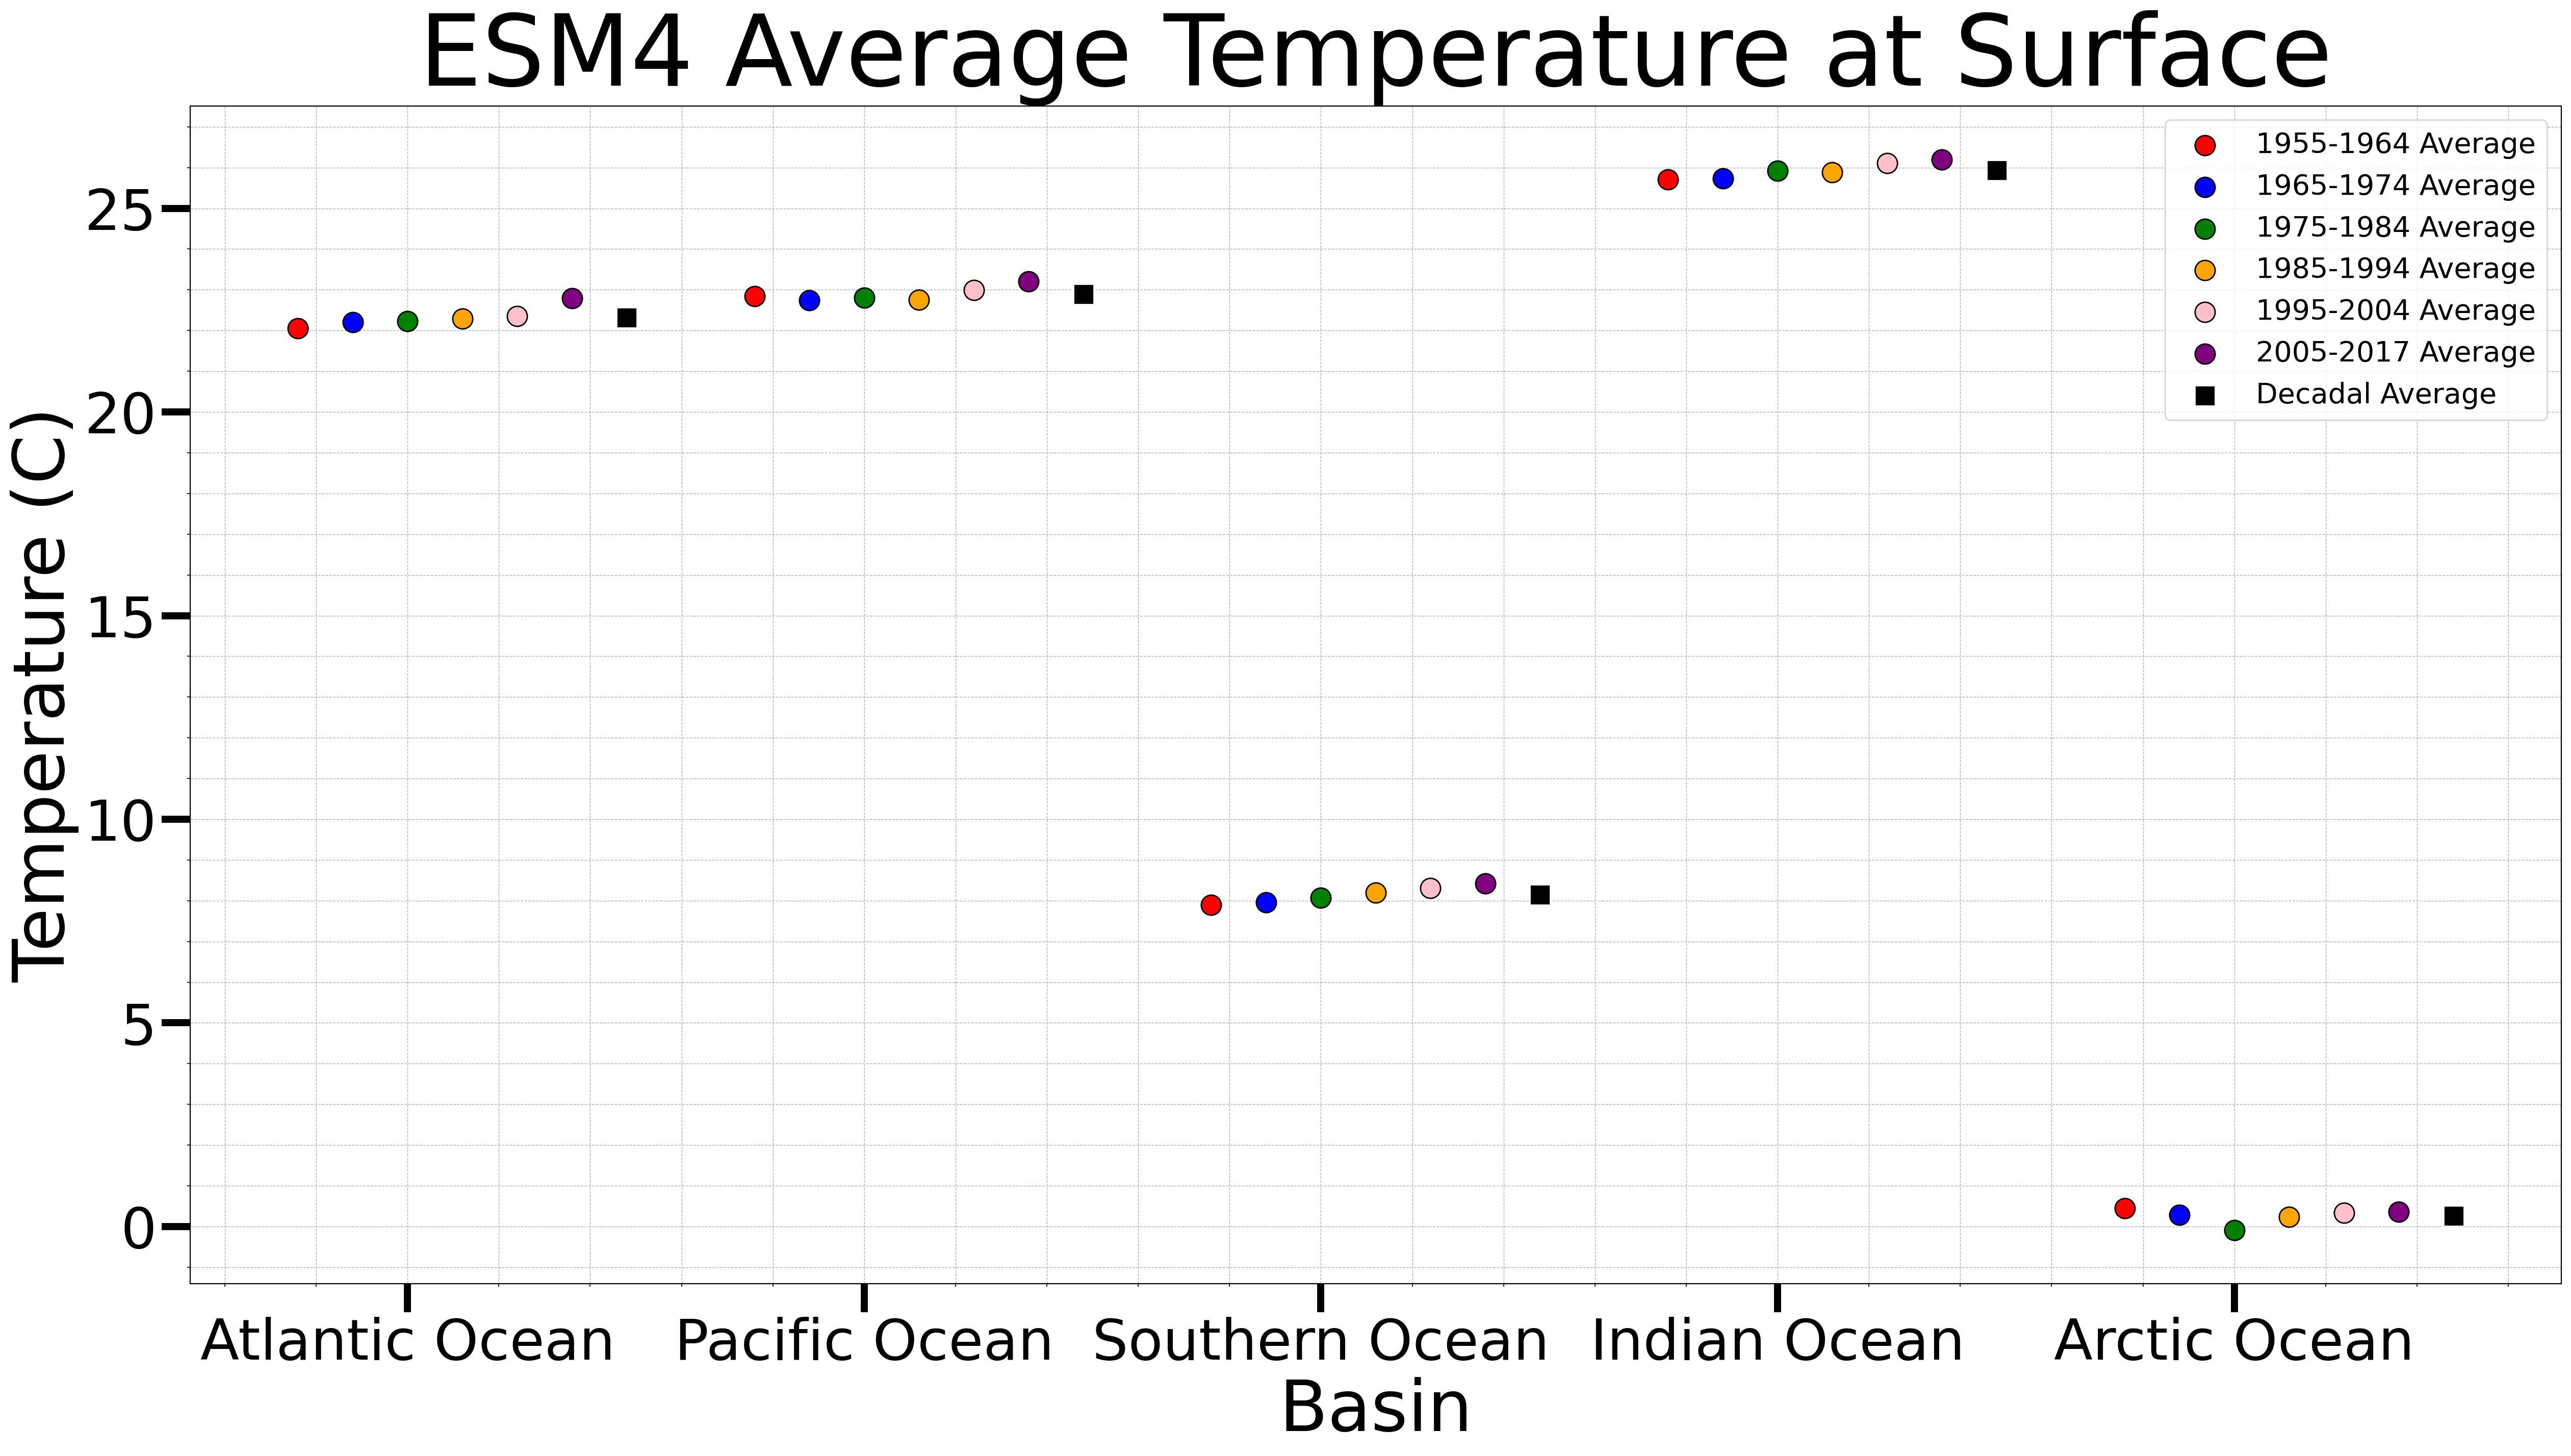

In [55]:
X = ['Atlantic Ocean', 'Pacific Ocean', 'Southern Ocean', 'Indian Ocean', 'Arctic Ocean'] 
woa_55_64_0 = [22.055007411375048,
22.838501968267646,
7.896285841652177,
25.713003230630385,
0.44841313110263326]
woa_65_74_0 = [22.20218008185678,
22.739882177849843,
7.957597683424093,
25.734527273536635,
0.29240197072292456
]
woa_75_84_0 = [22.22274305051252,
22.808951237094966,
8.077784778779618,
25.920081837144345,
-0.08320660951374802]
woa_85_94_0 = [22.287988855050987,
22.75468044935329,
8.192662295914621,
25.886847443659164,
0.2395837570613313]
woa_95_04_0 = [22.348661682314468,
22.98761167079241,
8.30426117267382,
26.108491674680543,
0.33766831349937265

]
woa_05_17_0 = [22.78572259030994,
23.202771795606093,
8.42406720676137,
26.200594493314632,
0.357453568609466]
woa_dec_0 = [22.317050678144874,
22.888733235526033,
8.142109851140521,
25.927257667772164,
0.2653856935717388]

# X-axis positions for the oceans
X_axis = np.arange(len(X)) 
marker_size = 200  # Adjust the size of the scatter points
shift = 0.12      # Shift for each dataset

# Create the plot
fig, ax = plt.subplots(figsize=(30, 15))

# Scatter plot for each time period
ax.scatter(X_axis - 2 * shift, woa_55_64_0, color='r', s=marker_size, label='1955-1964 Average', edgecolor='black')
ax.scatter(X_axis - shift, woa_65_74_0, color='blue', s=marker_size, label='1965-1974 Average', edgecolor='black')
ax.scatter(X_axis, woa_75_84_0, color='green', s=marker_size, label='1975-1984 Average', edgecolor='black')
ax.scatter(X_axis + shift, woa_85_94_0, color='orange', s=marker_size, label='1985-1994 Average', edgecolor='black')
ax.scatter(X_axis + 2 * shift, woa_95_04_0, color='pink', s=marker_size, label='1995-2004 Average', edgecolor='black')
ax.scatter(X_axis + 3 * shift, woa_05_17_0, color='purple', s=marker_size, label='2005-2017 Average', edgecolor='black')
ax.scatter(X_axis + 4 * shift, woa_dec_0, color='black', s=marker_size, label='Decadal Average', edgecolor='white', marker='s')

# Add the new data (woa_dec_1000) in black with square markers


# Grid, ticks, and labels
ax.grid(linewidth=0.5, linestyle='--', which='both', axis='both')
ax.set_axisbelow(True)
plt.xticks(X_axis, X, fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel("Basin", fontsize=50) 
plt.ylabel("Temperature (C)", fontsize=50)
plt.title("ESM4 Average Temperature at Surface", fontsize=70) 

ax.minorticks_on()

# Legend and tick adjustments
ax.legend(fontsize=20)
ax.tick_params(which='major', width=5)
ax.tick_params(which='major', length=20)

 **Fig 3** 10 year average of temperature in Kelvin at surface from 1955-2017 with decadal average from ESM4

In [56]:
print(weight_esm4_55_64_atlantic_1000.values)
print(weight_esm4_55_64_pacific_1000.values)
print(weight_esm4_55_64_southern_1000.values)
print(weight_esm4_55_64_indian_1000.values)
print(weight_esm4_55_64_arctic_1000.values)


4.916439275118539
4.022387079402314
3.163330133421703
5.553135247194636
0.5525158649509541


In [57]:
print(weight_esm4_65_74_atlantic_1000.values)
print(weight_esm4_65_74_pacific_1000.values)
print(weight_esm4_65_74_southern_1000.values)
print(weight_esm4_65_74_indian_1000.values)
print(weight_esm4_65_74_arctic_1000.values)


4.924364587075243
4.033145949289559
3.1164465000189616
5.526905095448402
0.5826224597781486


In [58]:
print(weight_esm4_75_84_atlantic_1000.values)
print(weight_esm4_75_84_pacific_1000.values)
print(weight_esm4_75_84_southern_1000.values)
print(weight_esm4_75_84_indian_1000.values)
print(weight_esm4_75_84_arctic_1000.values)

4.936981239216921
4.03523653273005
3.1293642215150212
5.506754729394183
0.5458364302758443


In [59]:
print(weight_esm4_85_94_atlantic_1000.values)
print(weight_esm4_85_94_pacific_1000.values)
print(weight_esm4_85_94_southern_1000.values)
print(weight_esm4_85_94_indian_1000.values)
print(weight_esm4_85_94_arctic_1000.values)

4.944971600820298
4.016433434985382
3.1539048270483643
5.500814109454074
0.5291121025267225


In [60]:
print(weight_esm4_95_04_atlantic_1000.values)
print(weight_esm4_95_04_pacific_1000.values)
print(weight_esm4_95_04_southern_1000.values)
print(weight_esm4_95_04_indian_1000.values)
print(weight_esm4_95_04_arctic_1000.values)

4.953029794427722
4.012469570505863
3.146343901820809
5.499854315547304
0.5549380581636143


In [61]:
print(weight_esm4_05_17_atlantic_1000.values)
print(weight_esm4_05_17_pacific_1000.values)
print(weight_esm4_05_17_southern_1000.values)
print(weight_esm4_05_17_indian_1000.values)
print(weight_esm4_05_17_arctic_1000.values)

4.982570115140262
4.006769275198728
3.173503733887772
5.517967504723026
0.4921064692427515


In [62]:
print(weight_esm4_dec_atlantic_1000.values)
print(weight_esm4_dec_pacific_1000.values)
print(weight_esm4_dec_southern_1000.values)
print(weight_esm4_dec_indian_1000.values)
print(weight_esm4_dec_arctic_1000.values)


4.943059438502878
4.021073641645118
3.1471488933360123
5.517571827727802
0.5428552309679211


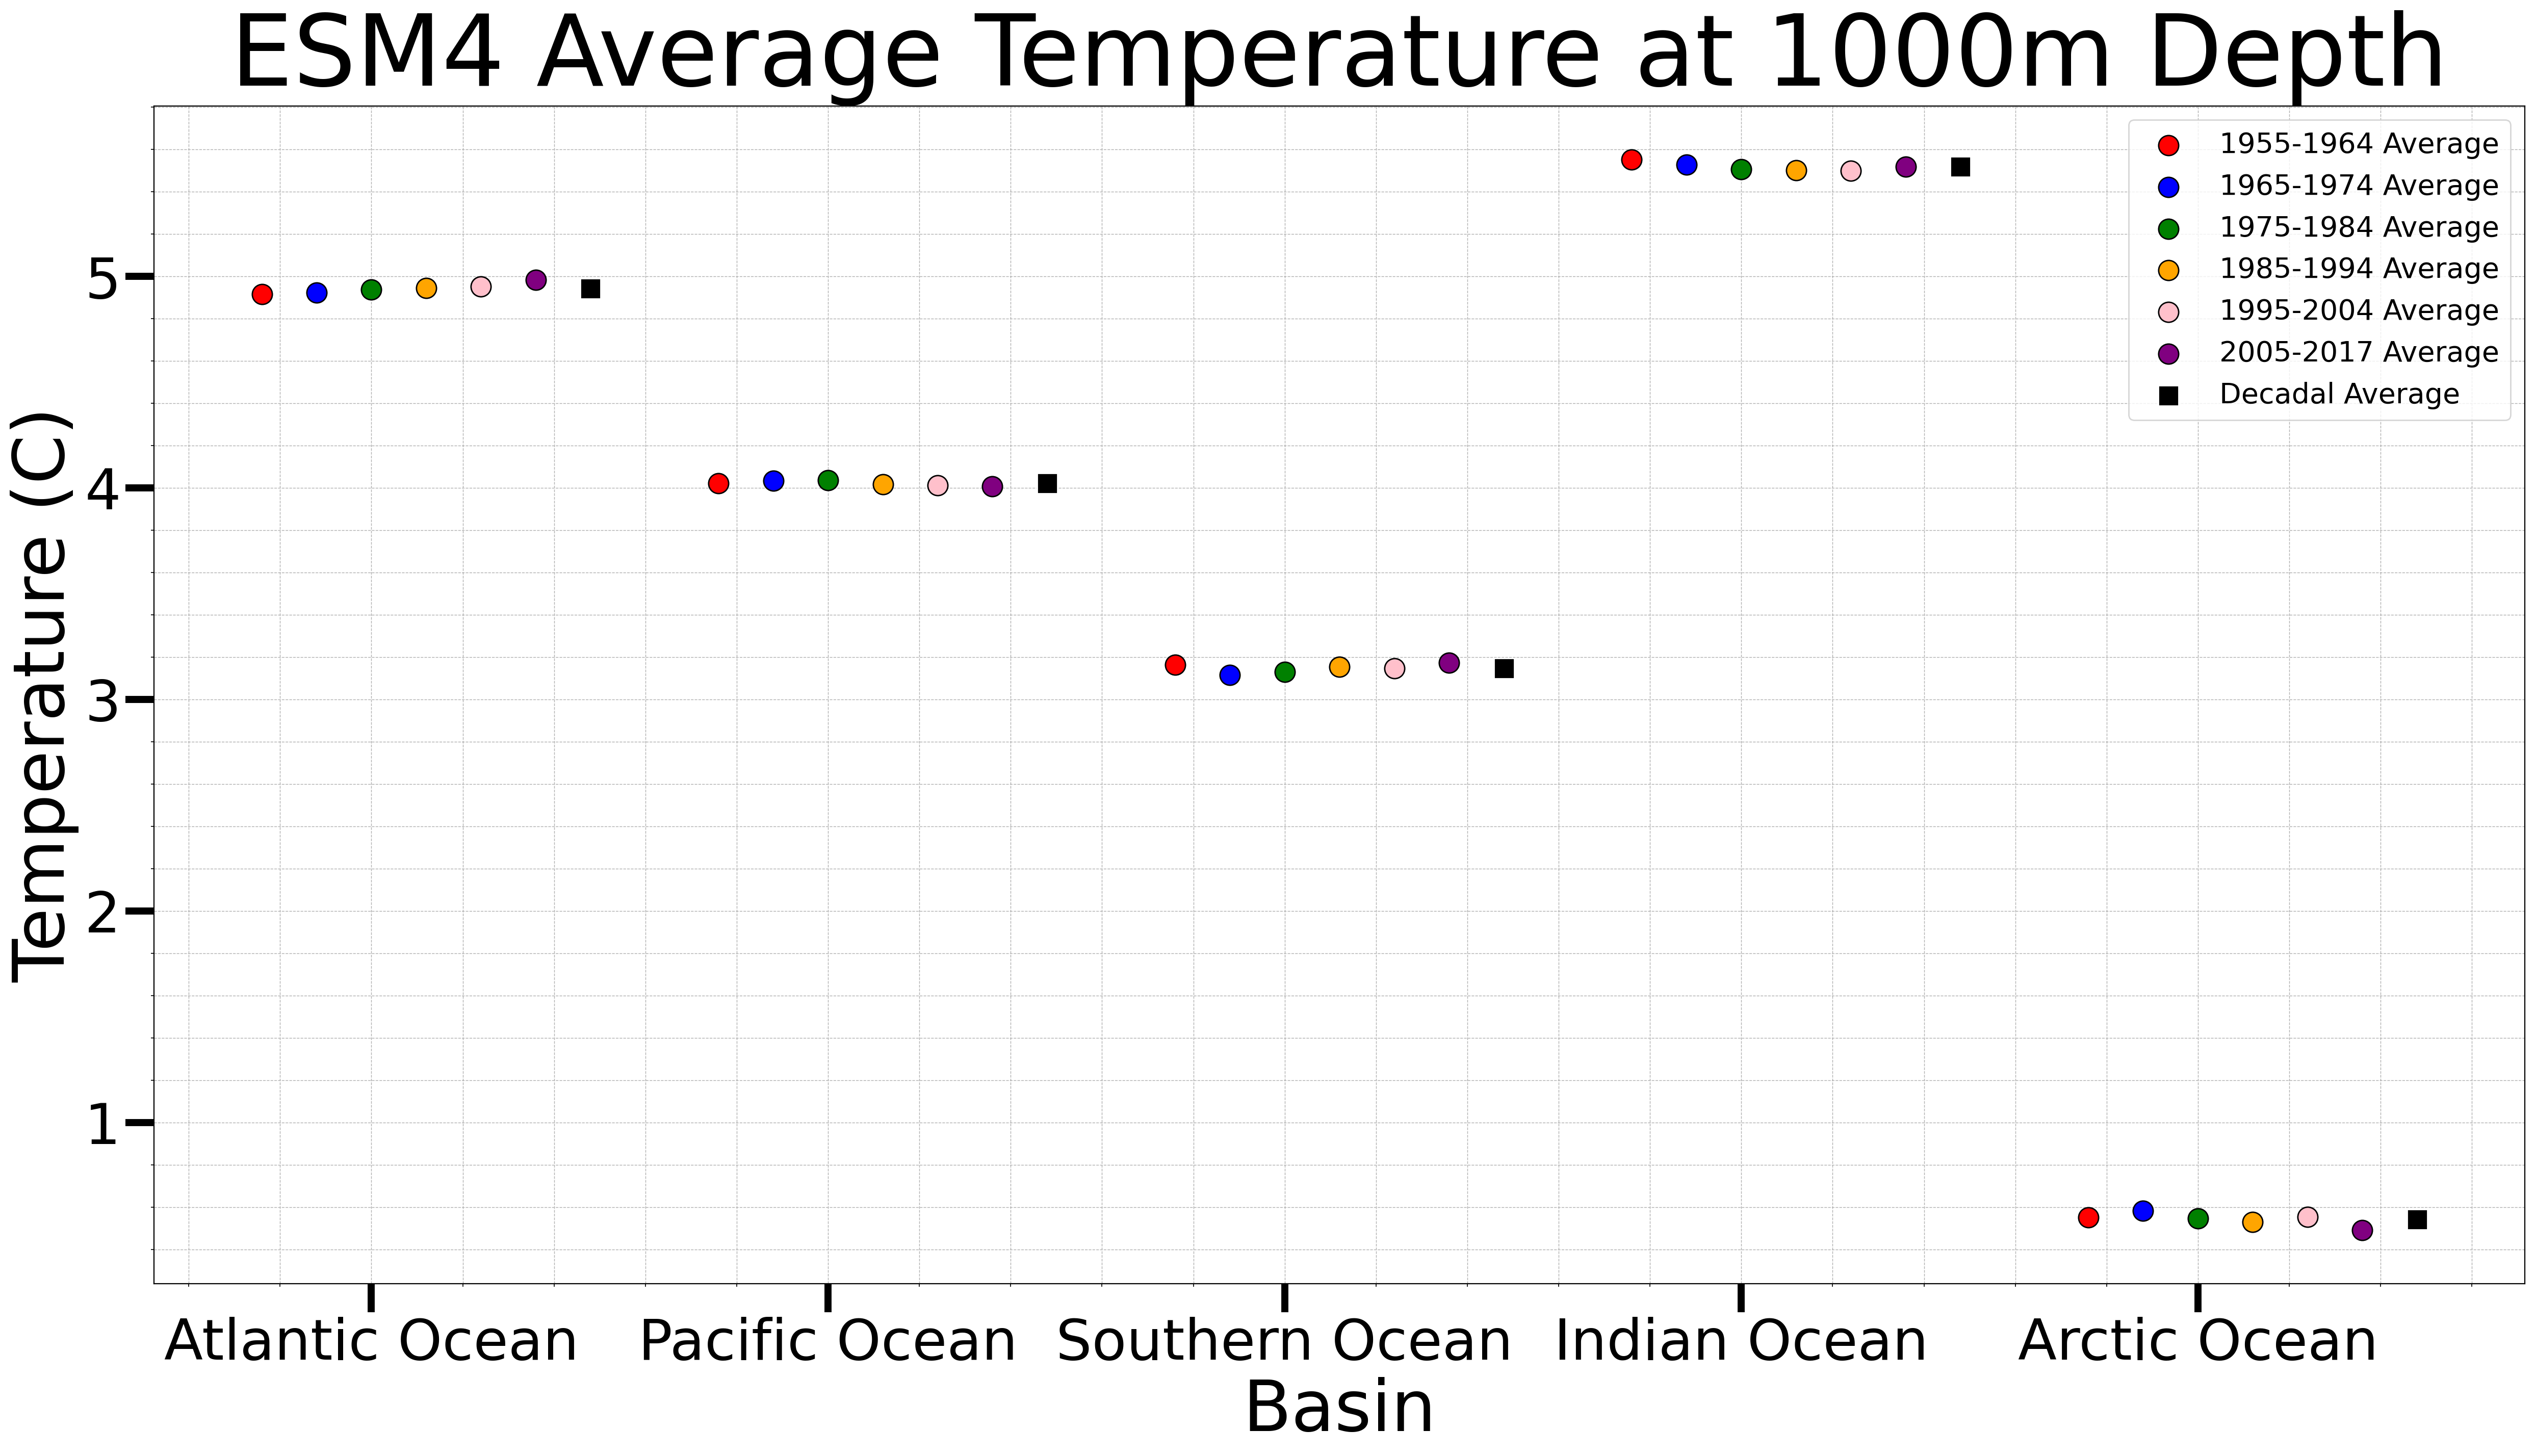

In [63]:
X = ['Atlantic Ocean', 'Pacific Ocean', 'Southern Ocean', 'Indian Ocean', 'Arctic Ocean'] 
woa_55_64_1000 = [4.916439275118539,
4.022387079402314,
3.163330133421703,
5.553135247194636,
0.5525158649509541]
woa_65_74_1000 = [4.924364587075243,
4.033145949289559,
3.1164465000189616,
5.526905095448402,
0.5826224597781486

]
woa_75_84_1000 = [4.936981239216921,
4.03523653273005,
3.1293642215150212,
5.506754729394183,
0.5458364302758443]
woa_85_94_1000 = [4.944971600820298,
4.016433434985382,
3.1539048270483643,
5.500814109454074,
0.5291121025267225
]
woa_95_04_1000 = [4.953029794427722,
4.012469570505863,
3.146343901820809,
5.499854315547304,
0.5549380581636143]
woa_05_17_1000 = [4.982570115140262,
4.006769275198728,
3.173503733887772,
5.517967504723026,
0.4921064692427515,

]
woa_dec_1000 = [4.943059438502878,
4.021073641645118,
3.1471488933360123,
5.517571827727802,
0.5428552309679211]

# X-axis positions for the oceans
X_axis = np.arange(len(X)) 
marker_size = 200  # Adjust the size of the scatter points
shift = 0.12     # Shift for each dataset

# Create the plot
fig, ax = plt.subplots(figsize=(30, 15))

# Scatter plot for each time period
ax.scatter(X_axis - 2 * shift, woa_55_64_1000, color='r', s=marker_size, label='1955-1964 Average', edgecolor='black')
ax.scatter(X_axis - shift, woa_65_74_1000, color='blue', s=marker_size, label='1965-1974 Average', edgecolor='black')
ax.scatter(X_axis, woa_75_84_1000, color='green', s=marker_size, label='1975-1984 Average', edgecolor='black')
ax.scatter(X_axis + shift, woa_85_94_1000, color='orange', s=marker_size, label='1985-1994 Average', edgecolor='black')
ax.scatter(X_axis + 2 * shift, woa_95_04_1000, color='pink', s=marker_size, label='1995-2004 Average', edgecolor='black')
ax.scatter(X_axis + 3 * shift, woa_05_17_1000, color='purple', s=marker_size, label='2005-2017 Average', edgecolor='black')
ax.scatter(X_axis+4*shift, woa_dec_1000, color='black', s=marker_size, label='Decadal Average', edgecolor='white', marker='s')

# Add the new data (woa_dec_1000) in black with square markers


# Grid, ticks, and labels
ax.grid(linewidth=0.5, linestyle='--', which='both', axis='both')
ax.set_axisbelow(True)
plt.xticks(X_axis, X, fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel("Basin", fontsize=50) 
plt.ylabel("Temperature (C)", fontsize=50)
plt.title("ESM4 Average Temperature at 1000m Depth", fontsize=70) 
# plt.ylim(272, 280)
ax.minorticks_on()

# Legend and tick adjustments
ax.legend(fontsize=20)
ax.tick_params(which='major', width=5)
ax.tick_params(which='major', length=20)

 **Fig 4** 10 year average of temperature in Kelvin at 1000m depth from 1955-2017 with decadal average from ESM4 

In [64]:
#WOA decadal average 0 depth
print(weight_dec_atlantic_0.values)
print(weight_dec_pacific_0.values)
print(weight_dec_southern_0.values)
print(weight_dec_indian_0.values)
print(weight_dec_arctic_0.values)

21.873621954477354
23.039807645873797
7.032931693864205
26.06812388227409
0.2126526660433765


In [65]:
#WOA decadal average 1000 depth
print(weight_dec_atlantic_1000.values)
print(weight_dec_pacific_1000.values)
print(weight_dec_southern_1000.values)
print(weight_dec_indian_1000.values)
print(weight_dec_arctic_1000.values)

5.235519726386714
4.18916845658299
2.9831278578268474
6.033843924328877
-0.21456162590664854


In [66]:
#ESM4 decadal average 0 depth
print(weight_esm4_dec_atlantic_0.values)
print(weight_esm4_dec_pacific_0.values)
print(weight_esm4_dec_southern_0.values)
print(weight_esm4_dec_indian_0.values)
print(weight_esm4_dec_arctic_0.values)


22.317050678144874
22.888733235526033
8.142109851140521
25.927257667772164
0.2653856935717388


In [67]:
#ESM4 decadal average 1000 depth
print(weight_esm4_dec_atlantic_1000.values)
print(weight_esm4_dec_pacific_1000.values)
print(weight_esm4_dec_southern_1000.values)
print(weight_esm4_dec_indian_1000.values)
print(weight_esm4_dec_arctic_1000.values)


4.943059438502878
4.021073641645118
3.1471488933360123
5.517571827727802
0.5428552309679211


In [68]:
#atlantic 0 
((22.317050678144874-21.873621954477354)/21.873621954477354)*100


2.027230444918398

In [70]:
#pacific 0

(abs(22.888733235526033-23.039807645873797)/23.039807645873797)*100

0.65571038035476

In [71]:
#southern 0

((8.142109851140521-7.032931693864205)/7.032931693864205)*100

15.771206170593203

In [72]:
#indian 0

(abs(25.927257667772164-26.06812388227409)/26.06812388227409)*100

0.5403772635809558

In [73]:
# arctic 0
((0.2653856935717388-0.2126526660433765)/0.2126526660433765)*100

24.797726973997086

|Basin|Percent Difference|
|-----|------------------|
|Atlantic|2.027230444918398 %|
|Pacific|0.65571038035476 %|
|Southern|15.771206170593203 %|
|Indian|0.5403772635809558 %|
|Arctic|24.797726973997086 %|

**Table 1** Percent difference of ESM4 from WOA18 for ocean surface temperature for each major basin

In [74]:
#atlantic 1000
(abs(4.943059438502878-5.235519726386714)/5.235519726386714)*100

5.586079380235227

In [76]:
#pacific 1000
(abs(4.021073641645118-4.18916845658299)/4.18916845658299)*100

4.012605763650359

In [77]:
#southern 1000
((3.1471488933360123-2.9831278578268474)/2.9831278578268474)*100

5.498290496628299

In [78]:
#Indian 1000
(abs(5.517571827727802-6.033843924328877)/6.033843924328877)*100

8.556271973151802

In [83]:
value1 = 0.5428552309679211
value2 = -0.21456162590664854

# Calculate the percentage difference
abs((value1 - value2) / value2) * 100



353.00667287267225

|Basin|Percent Difference|
|-----|------------------|
|Atlantic|5.586079380235227 %|
|Pacific|4.012605763650359 %|
|Southern|5.498290496628299 %|
|Indian|8.556271973151802 %|
|Arctic|353.00667287267225 %|